# 1. The LASSO and Boosting for Regression

## (a) Download the Communities and Crime data from https://archive.ics.uci.
## edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as
## the training set and the rest as the test set

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

f=open("communities.name","r")
lines=f.readlines()
result=[]
for x in lines:
    if "@attribute" in x:
        x = x.replace("@attribute ","")
        x = x.replace("\n","")
        x= x.replace(" numeric","")
        x = x.replace(" string","")
        x = x.replace("@data","")
        x = x.replace("@relation","")
        result.append(x)
f.close()
table = pd.DataFrame()
table = pd.read_csv('communities.data',delimiter =',' , header = None)
table.columns = result
table = table.replace('?', np.NaN)

In [129]:
table[:10]

state county community        communityname  fold  population  \
0      8    NaN       NaN         Lakewoodcity     1        0.19   
1     53    NaN       NaN          Tukwilacity     1        0.00   
2     24    NaN       NaN         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   
5      6    NaN       NaN    SouthPasadenacity     1        0.02   
6     44      7     41500          Lincolntown     1        0.01   
7      6    NaN       NaN            Selmacity     1        0.01   
8     21    NaN       NaN        Hendersoncity     1        0.03   
9     29    NaN       NaN          Claytoncity     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.33          0.02          0.90          0.12   
1           0.16          0.12          0.74          0.45   
2           0.42          0.49          0.56          0.17   
3           0.77          1.00          0.08          0.12   
4           0.55          0.02          0.95          0.09   
5           0.28          0.06          0.54          1.00   
6           0.39          0.00          0.98          0.06   
7           0.74          0.03          0.46          0.20   
8           0.34          0.20          0.84          0.02   
9           0.40          0.06          0.87          0.30   

          ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0         ...               0.12     0.26            0.20       0.06   
1         ...               0.02     0.12            0.45        NaN   
2         ...               0.01     0.21            0.02        NaN   
3         ...               0.02     0.39            0.28        NaN   
4         ...               0.04     0.09            0.02        NaN   
5         ...               0.01     0.58            0.10        NaN   
6         ...               0.05     0.08            0.06        NaN   
7         ...               0.01     0.33            0.00        NaN   
8         ...               0.04     0.17            0.04        NaN   
9         ...               0.00     0.47            0.11        NaN   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0           0.04                  0.9                  0.5   
1            NaN                  NaN                  NaN   
2            NaN                  NaN                  NaN   
3            NaN                  NaN                  NaN   
4            NaN                  NaN                  NaN   
5            NaN                  NaN                  NaN   
6            NaN                  NaN                  NaN   
7            NaN                  NaN                  NaN   
8            NaN                  NaN                  NaN   
9            NaN                  NaN                  NaN   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop  
0                 0.32             0.14                 0.20  
1                 0.00              NaN                 0.67  
2                 0.00              NaN                 0.43  
3                 0.00              NaN                 0.12  
4                 0.00              NaN                 0.03  
5                 0.00              NaN                 0.14  
6                 0.00              NaN                 0.03  
7                 0.00              NaN                 0.55  
8                 0.00              NaN                 0.53  
9                 0.00              NaN                 0.15  

[10 rows x 128 columns]

In [130]:
 table.shape

(1994, 128)

## (b) The data set has missing values. Use a data imputation technique to deal with
## the missing values in the data set.

In [39]:
import pandas as pd
import numpy as np
from sklearn.base import TransformerMixin

new_table = pd.DataFrame()

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        #Columns of dtype object are imputed with the most frequent value 
        #in column.

        #Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
        if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)


new_table = DataFrameImputer().fit_transform(table)



In [132]:
new_table[:10]

state county community        communityname  fold  population  \
0      8      3     79000         Lakewoodcity     1        0.19   
1     53      3     79000          Tukwilacity     1        0.00   
2     24      3     79000         Aberdeentown     1        0.00   
3     34      5     81440  Willingborotownship     1        0.04   
4     42     95      6096    Bethlehemtownship     1        0.01   
5      6      3     79000    SouthPasadenacity     1        0.02   
6     44      7     41500          Lincolntown     1        0.01   
7      6      3     79000            Selmacity     1        0.01   
8     21      3     79000        Hendersoncity     1        0.03   
9     29      3     79000          Claytoncity     1        0.01   

   householdsize  racepctblack  racePctWhite  racePctAsian  \
0           0.33          0.02          0.90          0.12   
1           0.16          0.12          0.74          0.45   
2           0.42          0.49          0.56          0.17   
3           0.77          1.00          0.08          0.12   
4           0.55          0.02          0.95          0.09   
5           0.28          0.06          0.54          1.00   
6           0.39          0.00          0.98          0.06   
7           0.74          0.03          0.46          0.20   
8           0.34          0.20          0.84          0.02   
9           0.40          0.06          0.87          0.30   

          ...           LandArea  PopDens  PctUsePubTrans  PolicCars  \
0         ...               0.12     0.26            0.20       0.06   
1         ...               0.02     0.12            0.45       0.02   
2         ...               0.01     0.21            0.02       0.02   
3         ...               0.02     0.39            0.28       0.02   
4         ...               0.04     0.09            0.02       0.02   
5         ...               0.01     0.58            0.10       0.02   
6         ...               0.05     0.08            0.06       0.02   
7         ...               0.01     0.33            0.00       0.02   
8         ...               0.04     0.17            0.04       0.02   
9         ...               0.00     0.47            0.11       0.02   

   PolicOperBudg  LemasPctPolicOnPatr  LemasGangUnitDeploy  \
0           0.04                  0.9                  0.5   
1           0.02                 0.79                    0   
2           0.02                 0.79                    0   
3           0.02                 0.79                    0   
4           0.02                 0.79                    0   
5           0.02                 0.79                    0   
6           0.02                 0.79                    0   
7           0.02                 0.79                    0   
8           0.02                 0.79                    0   
9           0.02                 0.79                    0   

   LemasPctOfficDrugUn  PolicBudgPerPop  ViolentCrimesPerPop  
0                 0.32             0.14                 0.20  
1                 0.00             0.12                 0.67  
2                 0.00             0.12                 0.43  
3                 0.00             0.12                 0.12  
4                 0.00             0.12                 0.03  
5                 0.00             0.12                 0.14  
6                 0.00             0.12                 0.03  
7                 0.00             0.12                 0.55  
8                 0.00             0.12                 0.53  
9                 0.00             0.12                 0.15  

[10 rows x 128 columns]

## (c) Plot a correlation matrix for the features in the data set.

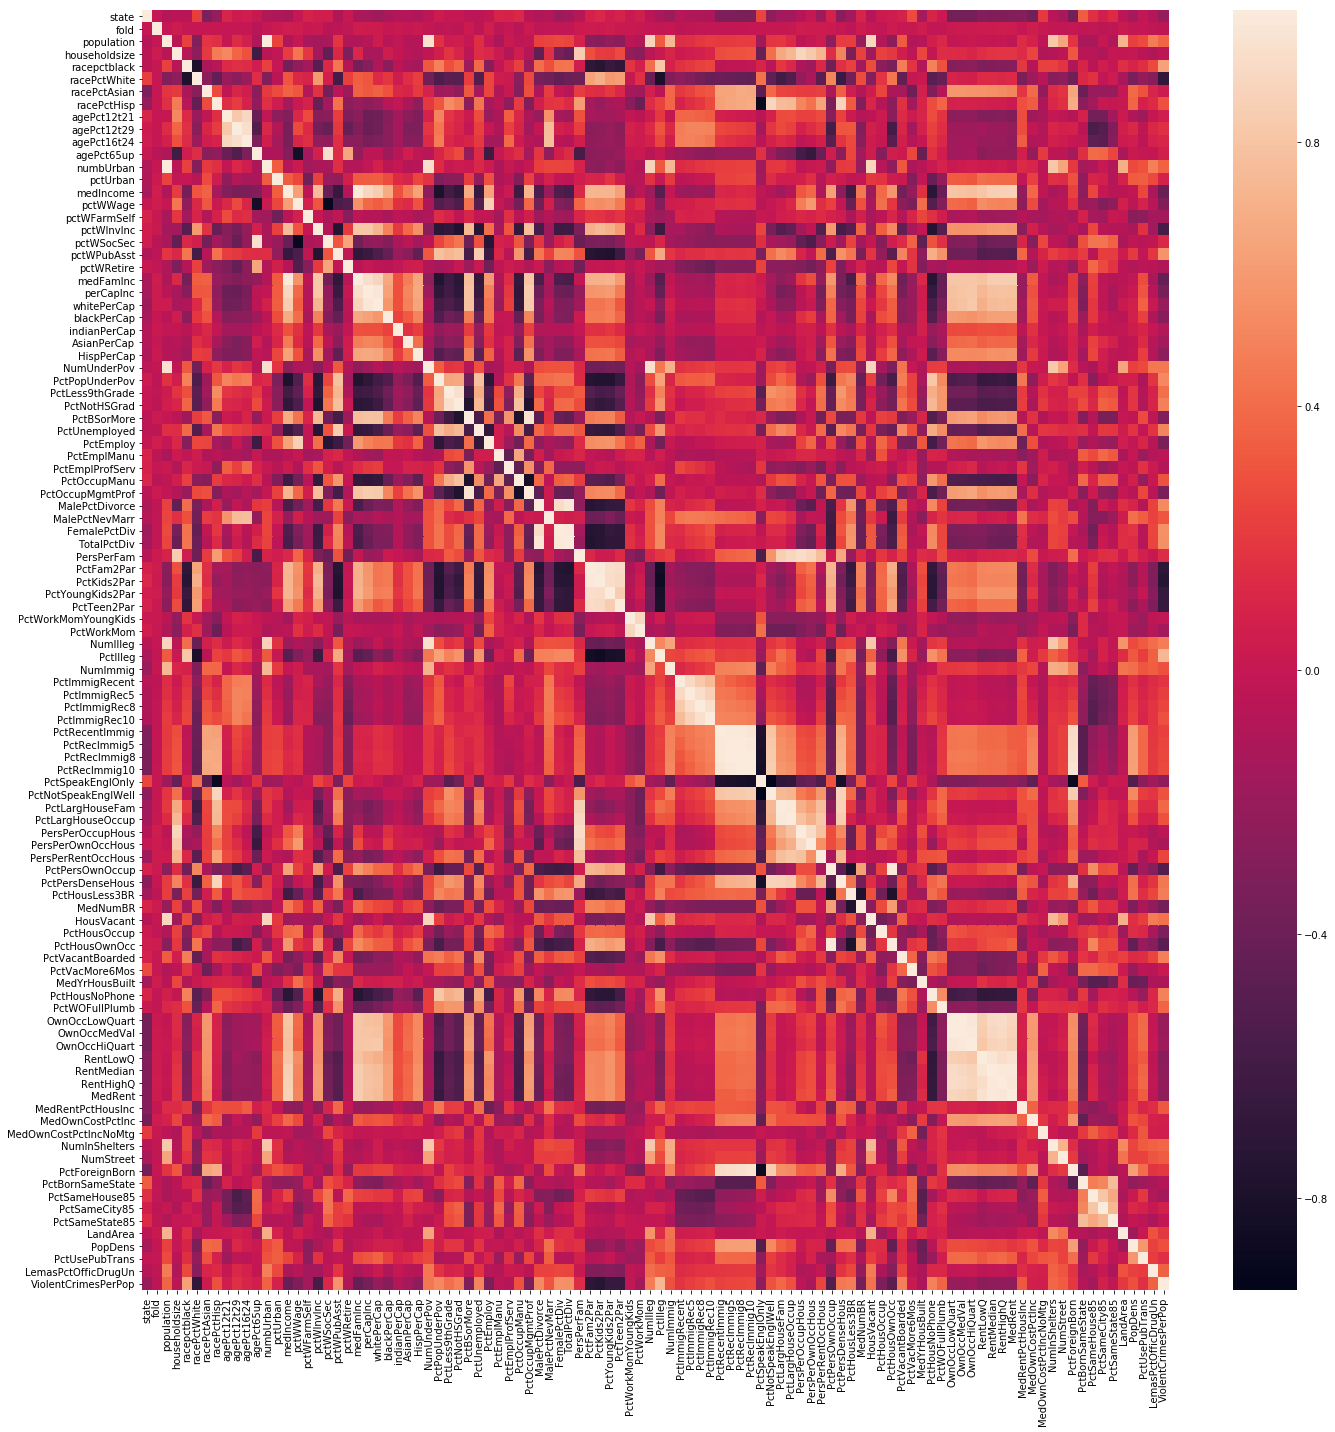

In [133]:
import seaborn as sb

corr = new_table.corr()
f, ax = plt.subplots(figsize=(20, 20))

sb.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.tight_layout()
plt.show()

## (d) Calculate the Coefficient of Variation for each feature.

In [40]:
temp = pd.DataFrame()
temp = new_table.select_dtypes(include=['float'])
mean_v=pd.DataFrame.mean(temp, axis=0)
std_v = pd.DataFrame.std(temp,axis=0)
c_var = std_v/mean_v
c_var = c_var * 100
c_var

population               220.350254
householdsize             35.329830
racepctblack             141.092040
racePctWhite              32.378156
racePctAsian             135.916219
racePctHisp              161.427779
agePct12t21               36.583987
agePct12t29               29.069289
agePct16t24               49.516051
agePct65up                42.344171
numbUrban                200.174364
pctUrban                  63.884887
medIncome                 57.975339
pctWWage                  32.771006
pctWFarmSelf              70.003012
pctWInvInc                35.923995
pctWSocSec                36.851263
pctWPubAsst               69.903050
pctWRetire                34.963908
medFamInc                 52.773189
perCapInc                 54.563343
whitePerCap               50.755219
blackPerCap               58.946900
indianPerCap              80.968509
AsianPerCap               60.619385
HispPerCap                47.395972
NumUnderPov              230.496971
PctPopUnderPov            75

# The above values are multiplied with 100 to find percentages

## (e) Pick sqrt(128) features with highest CV , and make scatter plots and box plots
## for them, similar to those on p. 129 of ISLR. Can you draw conclusions about
## significance of those features, just by the scatter plots?


In [42]:
# Top 11 features to choose
#best_cv = pd.DataFrame()
#top = []
#top = sorted(range(len(c_var)), key=lambda i: c_var[i])[-11:]
#best_cv = temp.iloc[:,top]
#best_cv[:10]
best_cv = pd.DataFrame()
top = []
a = c_var.sort_values(ascending = False)[:11]
al = list(a.keys())
print(al)
best_cv = temp[al]
best_cv[:10]

['NumStreet', 'NumInShelters', 'NumIlleg', 'NumImmig', 'LemasPctOfficDrugUn', 'NumUnderPov', 'population', 'numbUrban', 'HousVacant', 'LandArea', 'racePctHisp']


NumStreet  NumInShelters  NumIlleg  NumImmig  LemasPctOfficDrugUn  \
0        0.0           0.04      0.04      0.03                 0.32   
1        0.0           0.00      0.00      0.01                 0.00   
2        0.0           0.00      0.01      0.00                 0.00   
3        0.0           0.00      0.03      0.02                 0.00   
4        0.0           0.00      0.00      0.00                 0.00   
5        0.0           0.00      0.00      0.04                 0.00   
6        0.0           0.00      0.00      0.01                 0.00   
7        0.0           0.00      0.02      0.02                 0.00   
8        0.0           0.01      0.02      0.00                 0.00   
9        0.0           0.00      0.00      0.01                 0.00   

   NumUnderPov  population  numbUrban  HousVacant  LandArea  racePctHisp  
0         0.08        0.19       0.20        0.21      0.12         0.17  
1         0.01        0.00       0.02        0.02      0.02         0.07  
2         0.01        0.00       0.00        0.01      0.01         0.04  
3         0.01        0.04       0.06        0.01      0.02         0.10  
4         0.00        0.01       0.02        0.01      0.04         0.05  
5         0.01        0.02       0.04        0.02      0.01         0.25  
6         0.01        0.01       0.02        0.01      0.05         0.02  
7         0.03        0.01       0.00        0.01      0.01         1.00  
8         0.04        0.03       0.04        0.04      0.04         0.00  
9         0.00        0.01       0.02        0.02      0.00         0.03

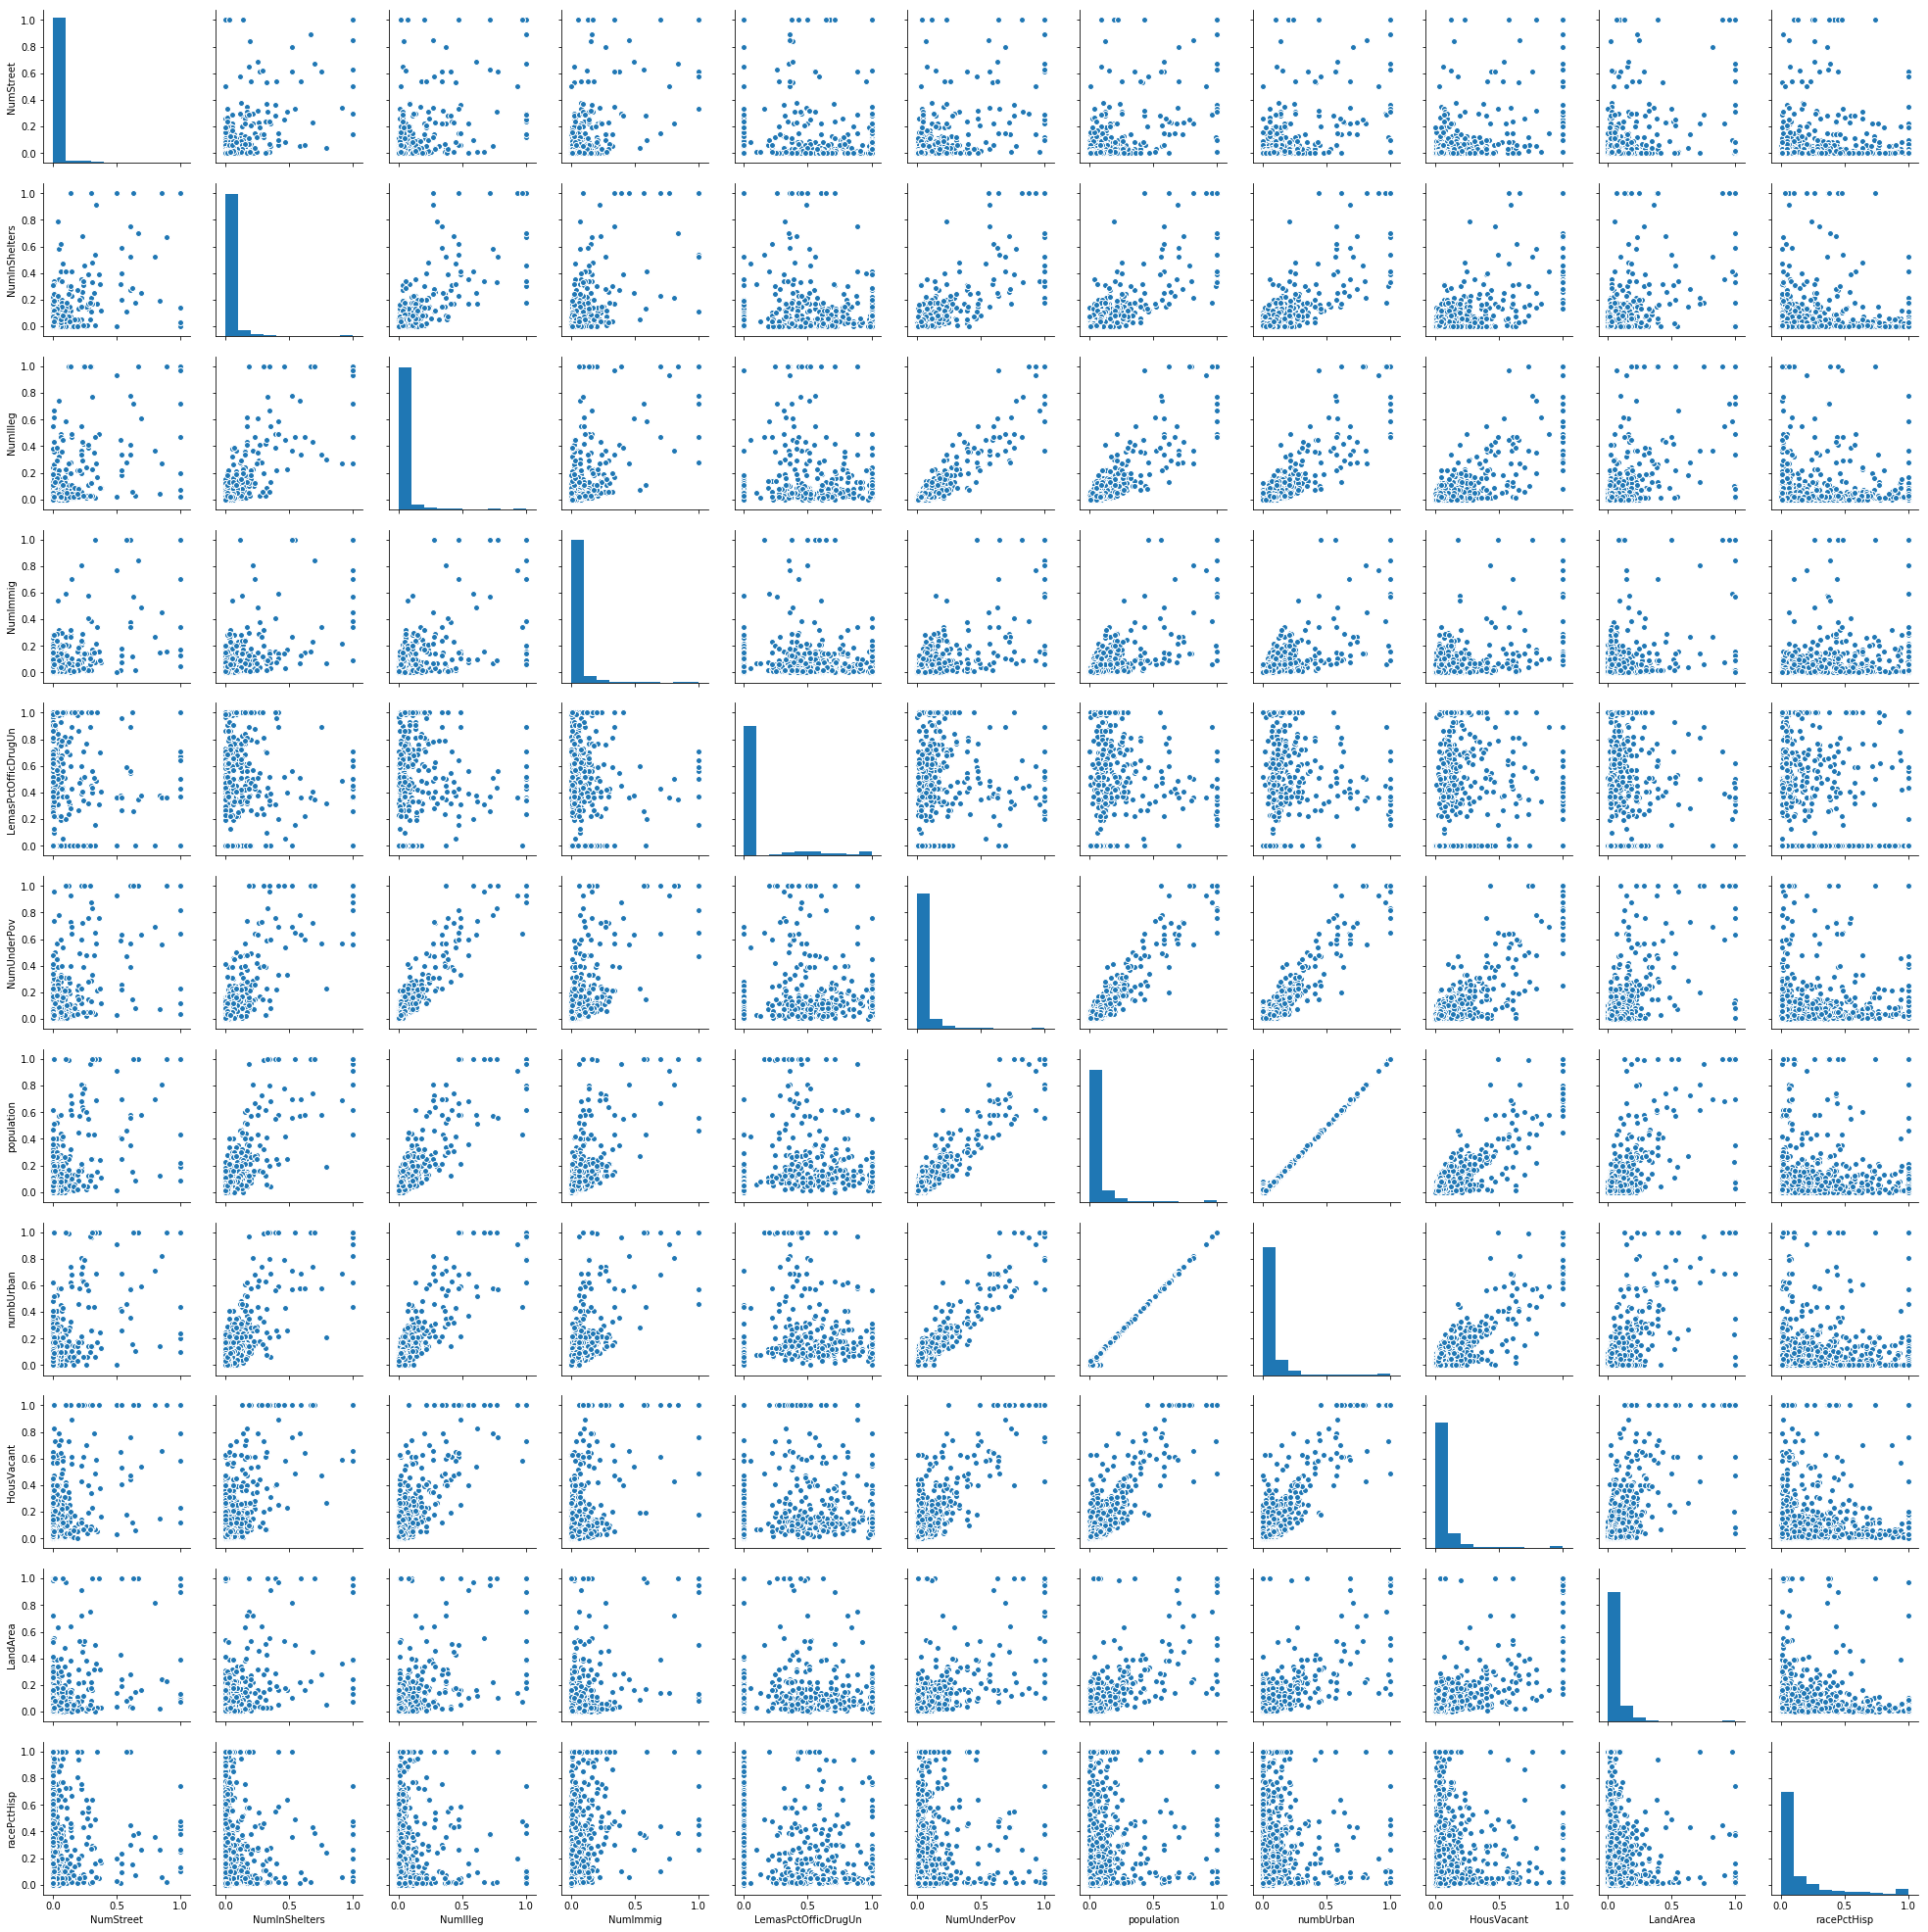

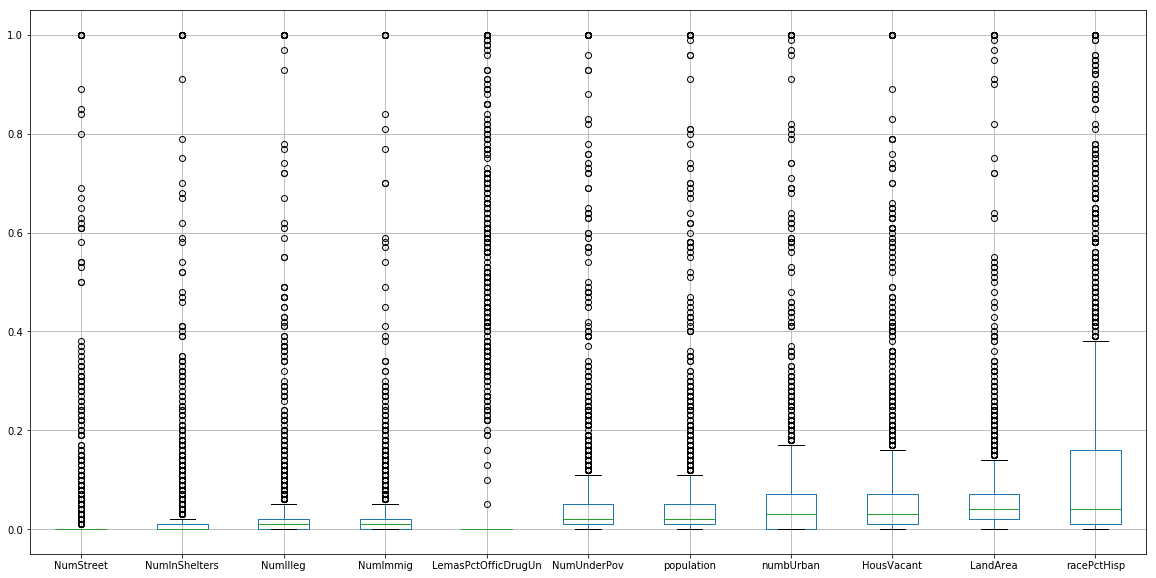

In [43]:
import seaborn as sb
import matplotlib.pyplot as plt
g = sb.pairplot(best_cv)
plt.show()
fig, ax = plt.subplots(figsize=(20,10))
best_cv.boxplot()
plt.show()

## The inferences that can be drawn from the above data are as follows
  1. Since all predictors are plotted together, the data needs to be zoomed into.
  2. Certain variables are linearly co-related to each other.
  3. Certain variables have a quadratic or higher co-relation with each other. 
  4. The selected predictors are significant in nature
  5. Certain variables are not co-related 

## (f) Fit a linear model using least squares to the training set and report the test error.

In [45]:
train_x = pd.DataFrame()
test_x = pd.DataFrame()
train_y = pd.DataFrame()
test_y = pd.DataFrame()
train = new_table.iloc[:1495,:]
test = new_table.iloc[1495:,:]
train_y["PCVC"] = train.iloc[:,127]
train_x = train.drop(['ViolentCrimesPerPop'],axis = 1)
test_y["PCVC"] = test.iloc[:,127]
test_x = test.drop(['ViolentCrimesPerPop'],axis = 1)

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
train_X = train_x.drop("communityname",axis = 1)
test_X = test_x.drop("communityname",axis = 1)
model = LinearRegression()
model.fit(train_X,train_y)
y_predict = model.predict(test_X)
#check if this is the error to be taken
test_error = mean_squared_error(test_y,y_predict)
print("The Test Error is",test_error)
test_error = r2_score(test_y,y_predict)
print("The R square Error is",test_error)

The Test Error is 0.01736512643264185
The R square Error is 0.6348435143834373


## (g) Fit a ridge regression model on the training set, with λ chosen by cross-validation.
## Report the test error obtained.

In [47]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import mean_squared_error
# pass alpha 100 times.
alp = np.array(np.linspace(0.1,100,100))
rcv = RidgeCV(alphas= alp, fit_intercept=True, normalize=False, scoring=None, cv=10, gcv_mode=None, store_cv_values=False)
predictor = rcv.fit(train_X,train_y)
print("The best Lamda Value ",predictor.alpha_)
rcv_pred = predictor.predict(test_X)
test_error = mean_squared_error(test_y,rcv_pred)
print("The Test Error is",test_error)

The best Lamda Value  2.118181818181818
The Test Error is 0.0169240763459448


## (h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report
## the test error obtained, along with a list of the variables selected by the model.
## Repeat with normalized features. Report the test error for both cases and compare
## them.

In [140]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
# pass alpha 100 times.
alp = np.array(np.linspace(0.0001,100,100))
rcv = LassoCV(alphas= alp, fit_intercept=True, normalize=False, cv=10)
predictor = rcv.fit(train_X,train_y)
print("The best Lamda is ",predictor.alpha_)
rcv_pred = predictor.predict(test_X)
test_error = mean_squared_error(test_y,rcv_pred)
print("The Test Error is",test_error)

/home/vishal/workspace/python3.6_env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best Lamda is  0.0001
The Test Error is 0.01709167127562867


In [208]:
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel

tx = train_X.drop(["state","county","fold"],axis = 1)

lm = linear_model.Lasso(alpha=0.0001)
lm.fit(tx,train_y)
#print(lm.coef_)
lm.coef_
model = SelectFromModel(lm, prefit=True) 
X_new = model.transform(tx) 
selected_variables = tx.columns[model.get_support()]
print("The seelcted features are as follows")

print(selected_variables, len(selected_variables))



The seelcted features are as follows
Index(['racepctblack', 'racePctAsian', 'agePct12t21', 'agePct12t29',
       'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf', 'pctWInvInc',
       'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap', 'blackPerCap',
       'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore', 'PctEmploy',
       'PctEmplManu', 'PctOccupManu', 'MalePctDivorce', 'MalePctNevMarr',
       'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par',
       'PctWorkMom', 'NumIlleg', 'PctIlleg', 'NumImmig', 'PctImmigRecent',
       'PctImmigRec10', 'PctRecImmig10', 'PctNotSpeakEnglWell',
       'PctLargHouseOccup', 'PersPerOccupHous', 'PctPersOwnOccup',
       'PctPersDenseHous', 'PctHousLess3BR', 'MedNumBR', 'HousVacant',
       'PctHousOccup', 'PctVacantBoarded', 'PctVacMore6Mos', 'MedYrHousBuilt',
       'PctHousNoPhone', 'PctWOFullPlumb', 'OwnOccLowQuart', 'RentLowQ',
       'MedRent', 'MedRe

In [60]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
skl = 32
# target is already normalized
norm_train_X = train_X
norm_train_y = train_y
norm_test_X = test_X

x = norm_train_X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
norm_train_X = pd.DataFrame(x_scaled)

x1 = norm_test_X.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x1_scaled = min_max_scaler.fit_transform(x1)
norm_test_X = pd.DataFrame(x1_scaled)

# pass alpha 100 times.
alp = np.array(np.linspace(0.0001,100,100))
rcv = LassoCV(alphas= alp, fit_intercept=True, normalize=True, cv=10) 
predictor = rcv.fit(norm_train_X,norm_train_y)
print("The best Lamda after normalization is ",predictor.alpha_)
rcv_pred = predictor.predict(norm_test_X)
test_error = mean_squared_error(test_y,rcv_pred)
print("The Test Error after normalization is",test_error)

/home/vishal/workspace/python3.6_env/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/home/vishal/workspace/python3.6_env/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1094: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


The best Lamda after normalization is  0.0001
The Test Error after normalization is 0.016912083519809586


In [61]:
from sklearn import linear_model
from sklearn.feature_selection import SelectFromModel


norm_train_X.columns = train_X.columns
tx1 = norm_train_X.drop(["state","county","fold"],axis = 1)

lm = linear_model.Lasso(alpha=0.0001)
lm.fit(tx1,train_y)
#print(lm.coef_)
lm.coef_
model = SelectFromModel(lm, prefit=True) 
X_new = model.transform(tx1) 
selected__variables = tx1.columns[model.get_support()]
selected_variables = selected__variables[:skl]
print("The selcted features are as follows")
print(selected_variables)

The selcted features are as follows
Index(['community', 'racepctblack', 'racePctAsian', 'agePct12t21',
       'agePct12t29', 'agePct65up', 'pctUrban', 'pctWWage', 'pctWFarmSelf',
       'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'whitePerCap',
       'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap',
       'HispPerCap', 'PctPopUnderPov', 'PctLess9thGrade', 'PctBSorMore',
       'PctEmploy', 'PctEmplManu', 'PctOccupManu', 'MalePctDivorce',
       'MalePctNevMarr', 'FemalePctDiv', 'PctKids2Par', 'PctYoungKids2Par',
       'PctTeen2Par', 'PctWorkMom'],
      dtype='object')


## The test error in both the cases did not change much as the values of the predictors even before normalization lied within the range of 0-1.

## (i) Fit a PCR model on the training set, with M (the number of principal components)
## chosen by cross-validation. Report the test error obtained.

In [142]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression, PLSSVD
from sklearn.metrics import mean_squared_error

X = train_x.drop('communityname',axis = 1)
y = train_y

Xt = test_x.drop('communityname',axis = 1)
yt = test_y

pca = PCA()
X_reduced = pca.fit_transform(scale(X))
Xt_reduced = pca.fit_transform(scale(Xt))

# 10-fold CV, with shuffle
n = len(X_reduced)
kf_10 = model_selection.KFold( n_splits=10, shuffle=True, random_state=1)

regr = LinearRegression()
mse = []


# Calculate MSE using CV for the 122 principle components, adding one component at the time.
for i in np.arange(1, len(X.columns)):
    score = -1*model_selection.cross_val_score(regr, X_reduced[:,:i], y.values.ravel(), cv=kf_10, scoring='neg_mean_squared_error').mean()
    mse.append(score)
    
print(mse)
 

[0.030371239980172833, 0.02794268642718507, 0.027723455025748727, 0.027793194163758046, 0.025873850759288004, 0.025903421340078253, 0.025185344392194282, 0.02235095734822434, 0.02127456875723991, 0.02073083865411495, 0.020753382341652422, 0.020712075094207142, 0.02066452197728204, 0.020686310944399416, 0.02074049554057982, 0.020522511216976392, 0.020415846848406895, 0.02045967995175044, 0.02040660372155849, 0.020269939200192384, 0.020216828646296665, 0.020218838059561005, 0.020230551471631313, 0.02023267783421675, 0.020203857875212262, 0.020235690508155463, 0.020224755325216275, 0.02005781387329162, 0.02006002763288394, 0.020073690208139993, 0.020101780739615938, 0.020038900753898938, 0.0200352350151559, 0.02001747826162584, 0.019796405723464784, 0.01980392652889467, 0.019737283629228938, 0.01973153640651085, 0.019695252816159133, 0.019693627674514224, 0.019700012228243236, 0.019712394522856537, 0.01975110857952598, 0.019793581137570078, 0.019761462362235686, 0.019768083949254875, 0.01

In [143]:
print("The number of principal components",np.argmin(mse))

The number of principal components 98


In [144]:
from sklearn.metrics import mean_squared_error
params = X_reduced[:,:98]
params1 = Xt_reduced[:,:98]
l_model = regr.fit(params, y.values.ravel())
solution = l_model.predict(params1)
test_error = mean_squared_error(yt,solution)`
print("The Test Error is",test_error)

The Test Error is 0.031064527599475256


## (j) In this section, we would like to fit a boosting tree to the data. As in classification
## trees, one can use any type of regression at each node to build a multivariate
## regression tree. Because the number of variables is large in this problem, one
## can use L1-penalized regression at each node. Such a tree is called L1 penalized
## gradient boosting tree. You can use XGBoost to fit the model tree. Determine α
## (the regularization term) using cross-validation.

In [145]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
from sklearn.grid_search import GridSearchCV

alphas = np.linspace(np.float_power(10,-5), np.float_power(10, -1), num = 10)
xclf = xgb.XGBRegressor()
xclf = GridSearchCV(estimator=xclf, param_grid={'reg_alpha':alphas}, cv=10, verbose=1, scoring="neg_mean_squared_error")
boost = xclf.fit(train_x.drop('communityname',axis = 1).values, train_y)
print("The best alpha is ",xclf.best_params_)
print("The Train error is ",xclf.best_score_)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   48.5s finished


The best alpha is  {'reg_alpha': 0.06667000000000001}
The Train error is  -0.018924324425332584


# 2. Tree-Based Methods

## (a) Download the APS Failure data from: https://archive.ics.uci.edu/ml/datasets/
## APS+Failure+at+Scania+Trucks# . The dataset contains a training set and a
## test set. The training set contains 60,000 rows, of which 1,000 belong to the positive
## class and 171 columns, of which one is the class column. All attributes are
## numeric.


In [2]:
import pandas as pd
table_train = pd.DataFrame()
table_test = pd.DataFrame()
table_test = pd.read_csv('aps_failure_test_set.csv',skiprows=20)
table_train = pd.read_csv('aps_failure_training_set.csv',skiprows=20)
print("Train Data Shape",table_train.shape)
print("Test Data Shape",table_test.shape)

Train Data Shape (60000, 171)
Test Data Shape (16000, 171)


In [147]:
table_train[:10]

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698     na  2130706438    280      0      0      0      0      0   
1   neg   33058     na           0     na      0      0      0      0      0   
2   neg   41040     na         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874     na        1368    458      0      0      0      0      0   
5   neg   38312     na  2130706432    218      0      0      0      0      0   
6   neg      14      0           6     na      0      0      0      0      0   
7   neg  102960     na  2130706432    116      0      0      0      0      0   
8   neg   78696     na           0     na      0      0      0      0      0   
9   pos  153204      0         182     na      0      0      0      0      0   

   ...     ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  ee_008 ee_009  \
0  ...    1240520  493384   721044   469792   339156  157956   73224      0   
1  ...     421400  178064   293306   245416   133654   81140   97576   1500   
2  ...     277378  159812   423992   409564   320746  158022   95128    514   
3  ...        240      46       58       44       10       0       0      0   
4  ...     622012  229790   405298   347188   286954  311560  433954   1218   
5  ...     388574  288278   900430   300412     1534     338     856      0   
6  ...        168      48       60       28        0       0       0      0   
7  ...     715518  384948   915978  1052166  1108672  341532  129504   7832   
8  ...     699290  362510  1190028  1012704   160090   63216   41202      4   
9  ...     129862   26872    34044    22472    34362       0       0      0   

  ef_000 eg_000  
0      0      0  
1      0      0  
2      0      0  
3      4     32  
4      0      0  
5      0      0  
6      0      0  
7      0      0  
8      0      0  
9      0      0  

[10 rows x 171 columns]

In [148]:
table_test[:10]

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg      60      0          20     12      0      0      0      0      0   
1   neg      82      0          68     40      0      0      0      0      0   
2   neg   66002      2         212    112      0      0      0      0      0   
3   neg   59816     na        1010    936      0      0      0      0      0   
4   neg    1814     na         156    140      0      0      0      0      0   
5   neg     174     na          26     24      0      0     na     na     na   
6   neg   40202     na         640    606      0      0      0      0      0   
7   neg  120278     na  2130706432    256      0      0      0      0      0   
8   neg   14592      0  2130706438    162      0      0      0      0      0   
9   neg   28338     na  2130706432    238      0      0      0      0      0   

   ...     ee_002  ee_003  ee_004  ee_005   ee_006  ee_007   ee_008 ee_009  \
0  ...       1098     138     412     654       78      88        0      0   
1  ...       1068     276    1620     116       86     462        0      0   
2  ...     495076  380368  440134  269556  1315022  153680      516      0   
3  ...     540820  243270  483302  485332   431376  210074   281662   3232   
4  ...       7646    4144   18466   49782     3176     482       76      0   
5  ...         na      na      na      na       na      na       na     na   
6  ...     526218  239734  439556  374248   169096   53658    41054    320   
7  ...    1006722  459658  876356  689532   568540  500624  1006628  34820   
8  ...     105024   57398   49152   38256   243268  145144        0      0   
9  ...     357006  150056  264776  239282   140548   74750    32958     84   

  ef_000 eg_000  
0      0      0  
1      0      0  
2      0      0  
3      0      0  
4      0      0  
5      0      0  
6      0      0  
7      0      0  
8      0      0  
9      0      0  

[10 rows x 171 columns]

## (b) Data Preparation
## This data set has missing values. When the number of data with missing values
## is significant, discarding them is not a good idea.
## i. Research what types of techniques are usually used for dealing with data with
## missing values. Pick at least one of them and apply it to this data in the
## next steps.


There are many ways of dealing with missing data and can be divided into two main categories. 

A. Remove missing values.
   1. Remove entire row with a missing value.
   2. Remove entire column with missing values.
   3. Depending upon where the least data will be lost, we choose to 1. or 2. 
    
B. Impute missing values.
   Two categories of data 
   1. Categorical Data.
      1.  Dummy code the varible
      2.  Impute a continuous value.  This will generally be between 0 and 1.
      3.  Round off to either 0 or 1, based on whether the imputed value is below or above.
           The above methods are generally leads to biased results, and incorrect standard errors.Below mentioned methods are              better.
      4.  Listwise deletion
      5.  Imputation of the continuous variable without rounding (just leave off step 3).
      6.  Logistic Regression imputation
      7.  Discriminant Analysis imputation
   2. Quantitative Data. 
      1.  A constant value that has meaning within the domain, such as 0, distinct from all other values.
      2.  A value from another randomly selected record.
      3.  A mean, median or mode value for the column.
      4.  A value estimated by another predictive model. (Can be done using LDA, SVM ...)
      
C. Choosing mean for quantitative and 'most frequent' for categorical as it has been proven to produce good results both in cases of Categorical as well as Quantitative data, since using KNN and LDA are depenedent on R and fancyimpute packages of python, for this we can skip them. 
     

In [4]:
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn.base import TransformerMixin
new_table_train = pd.DataFrame()
new_table_test  = pd.DataFrame()


class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        #Columns of dtype object are imputed with the most frequent value 
        #in column.

        #Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
        if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],index=X.columns)
        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)

    
new_table_train = table_train.replace('na',np.NaN)
new_table_test  = table_test.replace('na',np.NaN)
new_table_train = DataFrameImputer().fit_transform(new_table_train)
new_table_test = DataFrameImputer().fit_transform(new_table_test)

In [150]:
new_table_train[:10]

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg   76698      0  2130706438    280      0      0      0      0      0   
1   neg   33058      0           0      0      0      0      0      0      0   
2   neg   41040      0         228    100      0      0      0      0      0   
3   neg      12      0          70     66      0     10      0      0      0   
4   neg   60874      0        1368    458      0      0      0      0      0   
5   neg   38312      0  2130706432    218      0      0      0      0      0   
6   neg      14      0           6      0      0      0      0      0      0   
7   neg  102960      0  2130706432    116      0      0      0      0      0   
8   neg   78696      0           0      0      0      0      0      0      0   
9   pos  153204      0         182      0      0      0      0      0      0   

   ...     ee_002  ee_003   ee_004   ee_005   ee_006  ee_007  ee_008 ee_009  \
0  ...    1240520  493384   721044   469792   339156  157956   73224      0   
1  ...     421400  178064   293306   245416   133654   81140   97576   1500   
2  ...     277378  159812   423992   409564   320746  158022   95128    514   
3  ...        240      46       58       44       10       0       0      0   
4  ...     622012  229790   405298   347188   286954  311560  433954   1218   
5  ...     388574  288278   900430   300412     1534     338     856      0   
6  ...        168      48       60       28        0       0       0      0   
7  ...     715518  384948   915978  1052166  1108672  341532  129504   7832   
8  ...     699290  362510  1190028  1012704   160090   63216   41202      4   
9  ...     129862   26872    34044    22472    34362       0       0      0   

  ef_000 eg_000  
0      0      0  
1      0      0  
2      0      0  
3      4     32  
4      0      0  
5      0      0  
6      0      0  
7      0      0  
8      0      0  
9      0      0  

[10 rows x 171 columns]

In [151]:
new_table_test[:10]

class  aa_000 ab_000      ac_000 ad_000 ae_000 af_000 ag_000 ag_001 ag_002  \
0   neg      60      0          20     12      0      0      0      0      0   
1   neg      82      0          68     40      0      0      0      0      0   
2   neg   66002      2         212    112      0      0      0      0      0   
3   neg   59816      0        1010    936      0      0      0      0      0   
4   neg    1814      0         156    140      0      0      0      0      0   
5   neg     174      0          26     24      0      0      0      0      0   
6   neg   40202      0         640    606      0      0      0      0      0   
7   neg  120278      0  2130706432    256      0      0      0      0      0   
8   neg   14592      0  2130706438    162      0      0      0      0      0   
9   neg   28338      0  2130706432    238      0      0      0      0      0   

   ...     ee_002  ee_003  ee_004  ee_005   ee_006  ee_007   ee_008 ee_009  \
0  ...       1098     138     412     654       78      88        0      0   
1  ...       1068     276    1620     116       86     462        0      0   
2  ...     495076  380368  440134  269556  1315022  153680      516      0   
3  ...     540820  243270  483302  485332   431376  210074   281662   3232   
4  ...       7646    4144   18466   49782     3176     482       76      0   
5  ...          0       0       0       0        0       0        0      0   
6  ...     526218  239734  439556  374248   169096   53658    41054    320   
7  ...    1006722  459658  876356  689532   568540  500624  1006628  34820   
8  ...     105024   57398   49152   38256   243268  145144        0      0   
9  ...     357006  150056  264776  239282   140548   74750    32958     84   

  ef_000 eg_000  
0      0      0  
1      0      0  
2      0      0  
3      0      0  
4      0      0  
5      0      0  
6      0      0  
7      0      0  
8      0      0  
9      0      0  

[10 rows x 171 columns]

## ii. For each of the 170 features, calculate the coefficient of variation CV =s/m,
## where s is sample variance and m is sample mean

In [5]:
train_temp = pd.DataFrame()
train_temp = new_table_train.drop('class',axis = 1).astype(float)
train_temp = train_temp.select_dtypes(include=['float'])
mean_v = train_temp.mean()
std_v = train_temp.std()
c_var = std_v/mean_v
c_var

aa_000      2.450938
ab_000     10.383494
ac_000      2.310241
ad_000    244.375986
ae_000     24.200137
af_000     19.471295
ag_000     92.917755
ag_001     35.249314
ag_002     17.565907
ag_003      8.647402
ag_004      5.463604
ag_005      2.962107
ag_006      2.373831
ag_007      2.867503
ag_008      6.225099
ag_009     33.357567
ah_000      2.327519
ai_000     18.203806
aj_000     44.265996
ak_000     80.424975
al_000      9.173106
am_0        9.155221
an_000      2.265399
ao_000      2.284727
ap_000      3.094000
aq_000      2.869492
ar_000     11.354347
as_000     87.332500
at_000     23.708187
au_000     68.882751
             ...    
dl_000     39.739088
dm_000     36.261403
dn_000      2.903049
do_000      2.209986
dp_000      2.064214
dq_000     22.030103
dr_000      6.865446
ds_000      2.386891
dt_000      2.256602
du_000      2.925293
dv_000      3.596831
dx_000      5.374132
dy_000      7.796648
dz_000     51.332228
ea_000     34.946519
eb_000      4.561664
ec_00       2

## iii. Plot a correlation matrix for your features using pandas or any other tool.

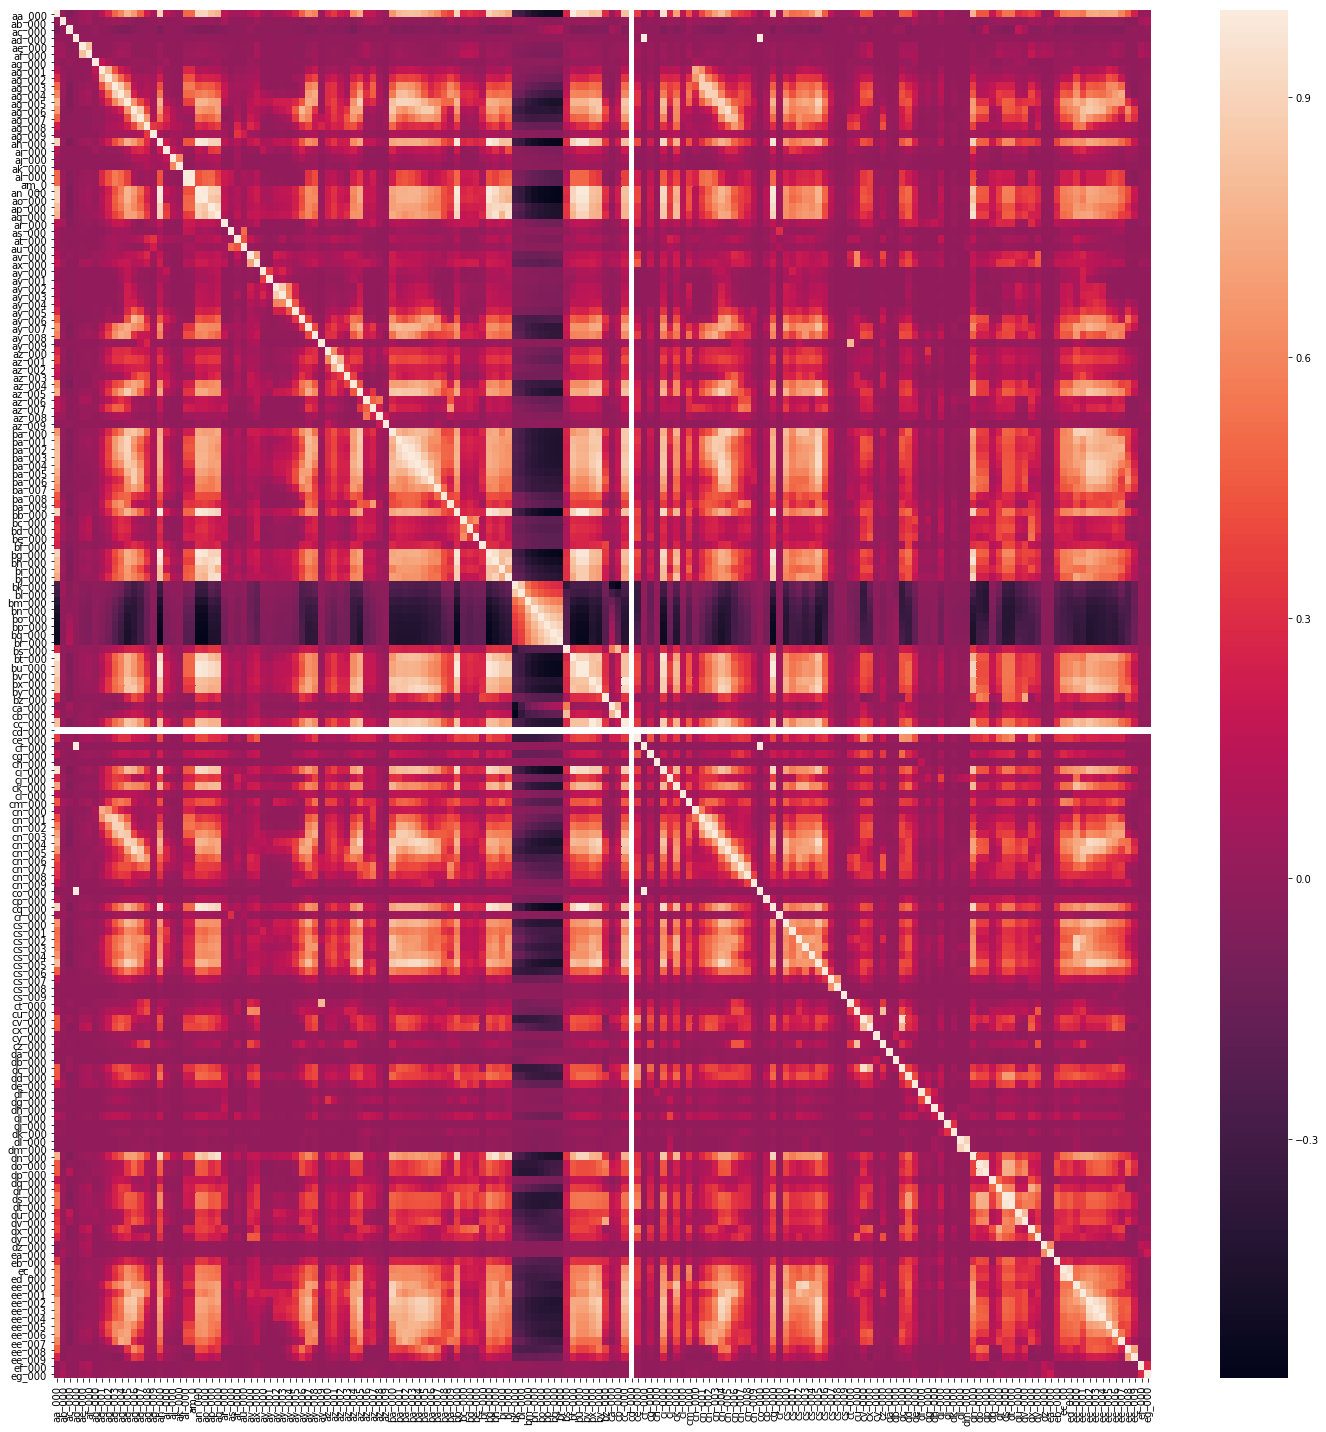

In [153]:
import seaborn as sb

corr = train_temp.corr()
f, ax = plt.subplots(figsize=(20, 20))

sb.heatmap(corr, xticklabels=corr.columns.values,yticklabels=corr.columns.values)
plt.tight_layout()
plt.show()

## iv. Pick b√170c features with highest CV , and make scatter plots and box plots
## for them, similar to those on p. 129 of ISLR. Can you draw conclusions about
## significance of those features, just by the scatter plots?

In [30]:
# Choosing 13 features
# Top 13 features to choose
best_cv = pd.DataFrame()
top = []
a = c_var.sort_values(ascending = False)[:13]
al = list(a.keys())
print(al)
best_cv = train_temp[al]
best_cv[:10]

['cf_000', 'co_000', 'ad_000', 'cs_009', 'dh_000', 'dj_000', 'ag_000', 'as_000', 'ay_009', 'ak_000', 'az_009', 'ch_000', 'au_000']


cf_000  co_000  ad_000  cs_009   dh_000  dj_000  ag_000  as_000  ay_009  \
0     2.0   220.0   280.0     0.0      0.0     0.0     0.0     0.0     0.0   
1     0.0     0.0     0.0     0.0      0.0     0.0     0.0     0.0     0.0   
2     0.0     0.0   100.0     0.0      0.0     0.0     0.0     0.0     0.0   
3     2.0     2.0    66.0     0.0      0.0     0.0     0.0     0.0     0.0   
4     0.0   202.0   458.0     0.0      0.0     0.0     0.0     0.0     0.0   
5     2.0     2.0   218.0     0.0      0.0     0.0     0.0     0.0     0.0   
6     0.0     0.0     0.0     0.0      0.0     0.0     0.0     0.0     0.0   
7     2.0     6.0   116.0     0.0      0.0     0.0     0.0     0.0     0.0   
8     0.0     0.0     0.0     0.0      0.0     0.0     0.0     0.0     0.0   
9     0.0     0.0     0.0     0.0  55760.0     0.0     0.0     0.0     0.0   

   ak_000  az_009  ch_000  au_000  
0     0.0     0.0     0.0     0.0  
1     0.0     0.0     0.0     0.0  
2     0.0     0.0     0.0     0.0  
3     0.0     0.0     0.0     0.0  
4     0.0     0.0     0.0     0.0  
5     0.0     0.0     0.0     0.0  
6     0.0     0.0     0.0     0.0  
7     0.0     0.0     0.0     0.0  
8     0.0     2.0     0.0     0.0  
9     0.0     0.0     0.0     0.0

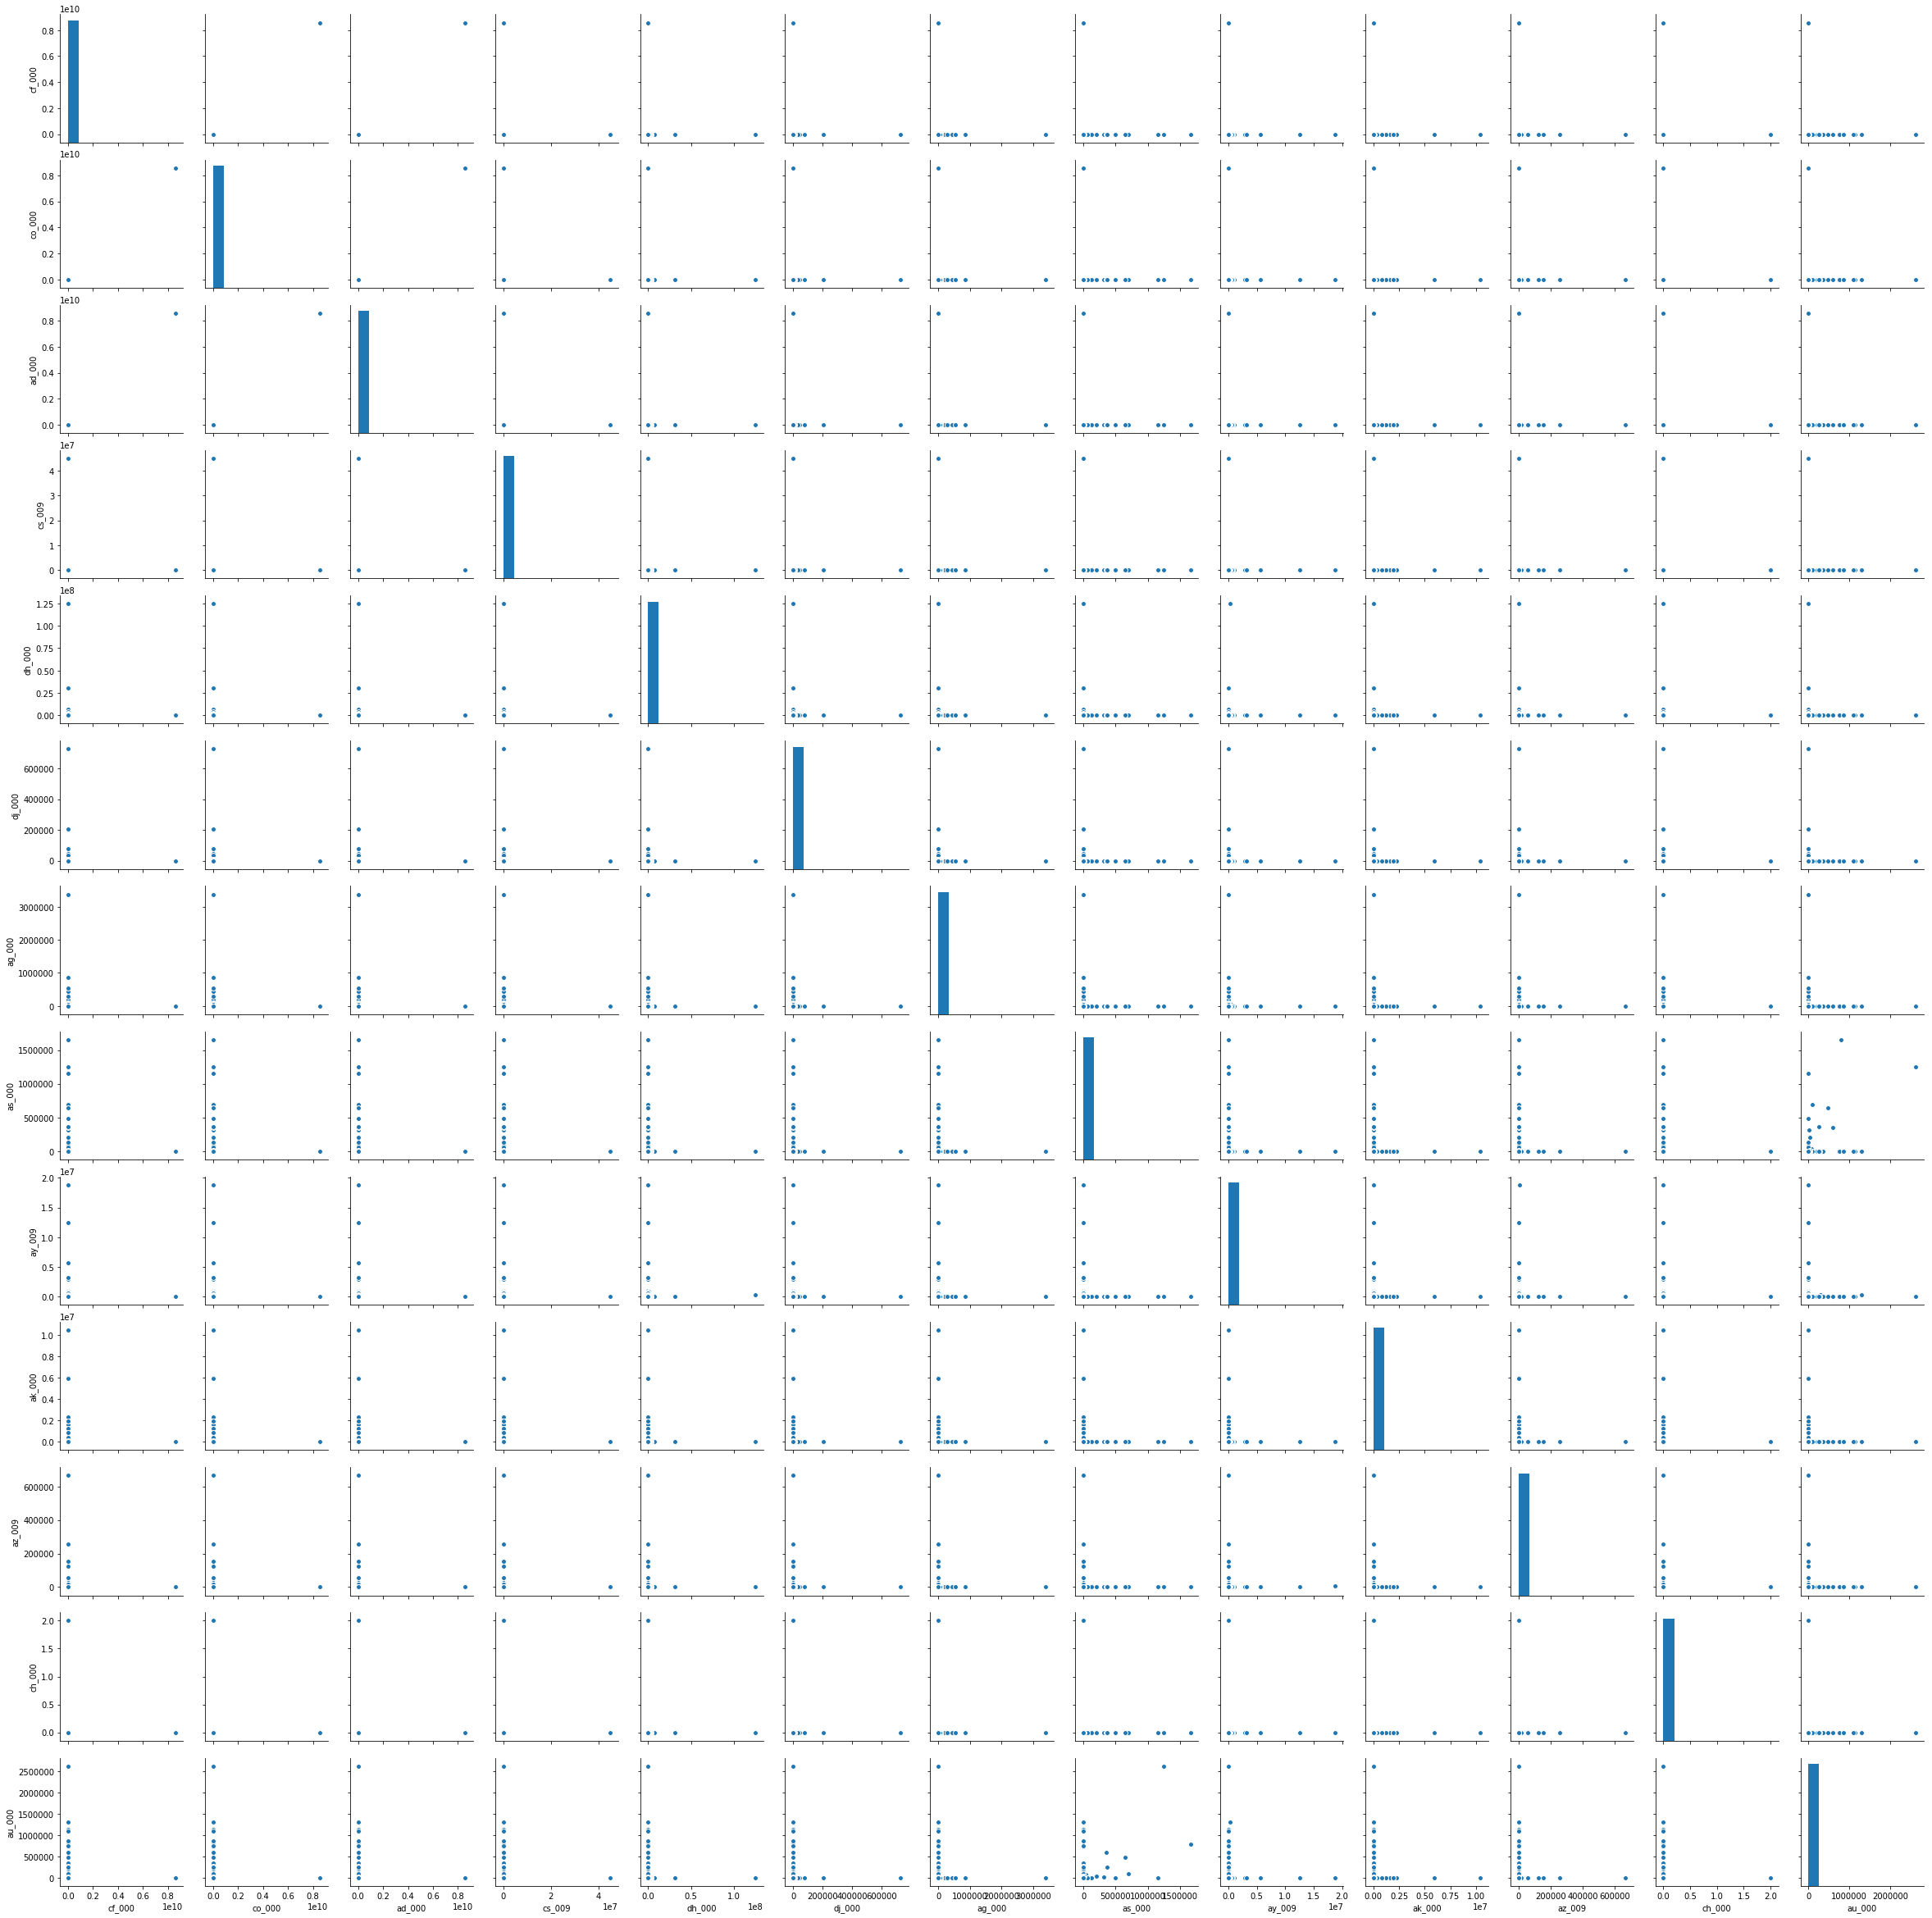

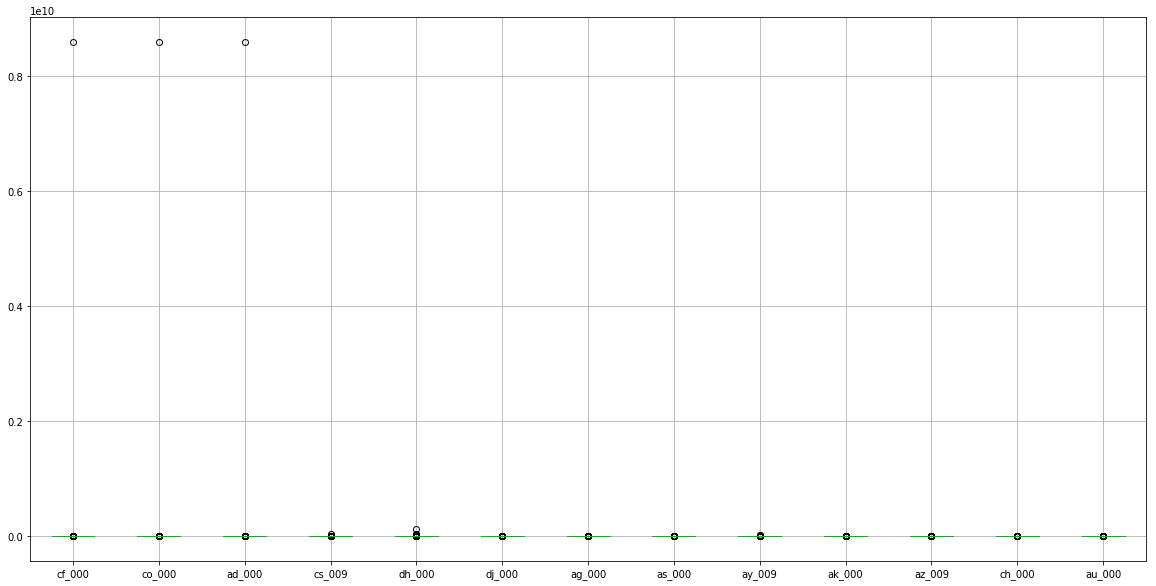

In [35]:
import seaborn as sb
import matplotlib.pyplot as plt 
g = sb.pairplot(best_cv)
plt.show()
fig, ax = plt.subplots(figsize=(20,10))
best_cv.boxplot()
plt.show()

## Conclusions that can be draw from the above data are as follows.
1. Majority of the data is missing in significant number of the columns.
2. Ideally imputation for missing data above 30 percent is not recomended.
3. Majority of the predictors are linearly co-related to each other. 

 ## v. Determine the number of positive and negative data. Is this data set imbalanced?


In [156]:
neg_c = 0
pos_c = 0
for i in new_table_train['class']:
    if 'neg' in i:
        neg_c = neg_c + 1
    else:
        pos_c = pos_c + 1
        
print("The number of negative classes is ", neg_c)
print("The number of positive classes is ", pos_c)

print("Yes, This Dataset is highly imbalanced")

The number of negative classes is  59000
The number of positive classes is  1000
Yes, This Dataset is highly imbalanced


## (c) Train a random forest to classify the data set. Do NOT compensate for class
## imbalance in the data set. Calculate the confusion matrix, ROC, AUC, and
## misclassification for training and test sets and report them (You may use pROC
## package). Calculate Out of Bag error estimate for your random forset and compare
## it to the test error

In [157]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
import numpy as np
from sklearn.metrics import accuracy_score
        
rf_y = new_table_train['class']
rf_y = [0 if x=='neg' else 1 for x in rf_y]
rf_x = new_table_train.drop(['class'],axis = 1)

rf_testy = new_table_test['class']
rf_testy = [0 if x=='neg' else 1 for x in rf_testy]
rf_testx  = new_table_test.drop(['class'],axis = 1)

# Create object classifiers
clf = RandomForestClassifier(oob_score = "True")
# Fit data
rf_m = clf.fit(rf_x,rf_y)

rf_y_Trpred = rf_m.predict(rf_x)
rf_y_Tepred = rf_m.predict(rf_testx)

rf_y_Trpred1 = rf_m.predict_proba(rf_x)
rf_y_Tepred1 = rf_m.predict_proba(rf_testx)

auctr = accuracy_score(rf_y_Trpred,rf_y)
aucte = accuracy_score(rf_y_Tepred,rf_testy)


/home/vishal/workspace/python3.6_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/vishal/workspace/python3.6_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


In [158]:
# data preperation

pp_train = pd.DataFrame()
pp_test = pd.DataFrame()
pp_train_y = pd.DataFrame()
pp_train_x = pd.DataFrame()
pp_test_y = pd.DataFrame()
pp_test_x = pd.DataFrame()
#FUll data Test + Train
pp_train = new_table_train 
pp_test = new_table_test 
#Train
pp_train_y = new_table_train['class']
pp_train_x = new_table_train.drop(['class'],axis = 1)
pp_train_y = pp_train_y.replace('neg',0)
pp_train_y = pp_train_y.replace('pos',1)
#Test
pp_test_y = new_table_test['class']
pp_test_x = new_table_test.drop(['class'],axis = 1)
pp_test_y = pp_test_y.replace('neg',0)
pp_test_y = pp_test_y.replace('pos',1)

Confusion matrix, without normalization
[[58998     2]
 [   32   968]]


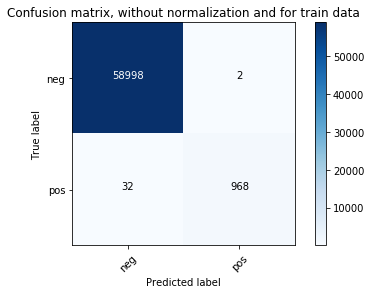

Confusion matrix, without normalization
[[15605    20]
 [  120   255]]


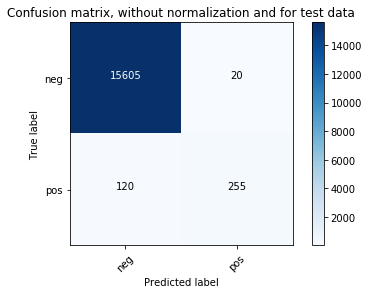

In [159]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["neg","pos"]
classes=class_names
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(rf_y, rf_y_Trpred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization and for train data')
plt.show()

cnf_matrix = confusion_matrix(rf_testy, rf_y_Tepred)   
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization and for test data')
plt.show()

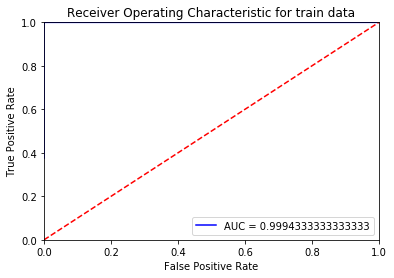

Misclassification rate is  0.0005666666666667153


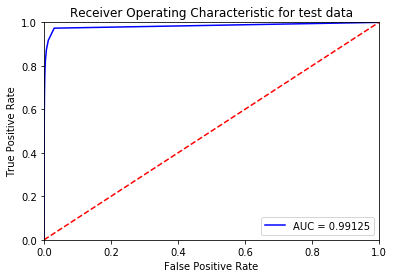

Misclassification rate is  0.008750000000000036


In [160]:
from sklearn import metrics 

op = rf_y_Trpred1[:,1]
ip = rf_y


fpr, tpr, threshold = metrics.roc_curve(ip,op)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for train data')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(auctr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Misclassification rate is ", (1 - auctr))

op1 = rf_y_Tepred1[:,1]
ip1 = rf_testy


fpr, tpr, threshold = metrics.roc_curve(ip1,op1)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for test data')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(aucte))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Misclassification rate is ", (1 - aucte))



In [161]:
oob = rf_m.oob_score_
print("The OOB error is",1 - oob)
#TE = rf_m.score(rf_y_Tepred[:,1],rf_testy)
#print("Test error is",TE)

The OOB error is 0.009166666666666656


## (d) Research how class imbalance is addressed in random forests. Compensate for
## class imbalance in your random forest and repeat 2c. Compare the results with
## those of 2c.

Random forest can handle imbalanced classes in two ways. 
 1. One is based on cost sensitive learning
.It is to make random forest more suitable for learning from extremely imbalanced data follows
the idea of cost sensitive learning. Since the RF classifier tends to be biased towards the majority class, we
shall place a heavier penalty on misclassifying the minority class. We assign a weight to each class, with the
minority class given larger weight (i.e., higher misclassification cost). The class weights are incorporated
into the RF algorithm in two places. In the tree induction procedure, class weights are used to weight
the Gini criterion for finding splits. In the terminal nodes of each tree, class weights are again taken into
consideration. The class prediction of each terminal node is determined by “weighted majority vote”; i.e.,
the weighted vote of a class is the weight for that class times the number of cases for that class at the
terminal node. The final class prediction for RF is then determined by aggregatting the weighted vote from
each individual tree, where the weights are average weights in the terminal nodes.

 2. Other is based on a sampling technique
    The Balanced Random Forest (BRF) algorithm is shown below:
a. For each iteration in random forest, draw a bootstrap sample from the minority class. Randomly draw
the same number of cases, with replacement, from the majority class.
b. Induce a classification tree from the data to maximum size, without pruning. The tree is induced with
the CART algorithm, with the following modification: At each node, instead of searching through all
variables for the optimal split, only search through a set of mtry randomly selected variables.
c. Repeat the two steps above for the number of times desired. Aggregate the predictions of the ensemble
and make the final prediction.
Basically instead of down sampling , the miniority class is taken in such a way that majority and minotiy have the same representation. 

In [162]:
# BY USING RANDOM OVER SAMPLER 

from collections import Counter
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler 

X_train = pd.DataFrame() 
y_train = pd.DataFrame() 
X_test  = pd.DataFrame() 
y_test  = pd.DataFrame() 

X_train = pp_train_x
y_train = pp_train_y
X_test  = pp_test_x
y_test  = pp_test_y

#nm = NearMiss(random_state=42)
nm = RandomOverSampler(random_state=42)
X_res, y_res = nm.fit_sample(X_train, y_train)

# Create object classifiers
clf_b = RandomForestClassifier(oob_score = "True")
# Fit data
rf_mb = clf_b.fit(X_res,y_res)

training_pred = rf_mb.predict(X_res)
testing_pred = rf_mb.predict(X_test)

training_pred1 = rf_mb.predict_proba(X_res)
testing_pred1  = rf_mb.predict_proba(X_test)

auct1 = accuracy_score(training_pred,y_res)
auct2 = accuracy_score(testing_pred,y_test)




/home/vishal/workspace/python3.6_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:453: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/home/vishal/workspace/python3.6_env/lib/python3.6/site-packages/sklearn/ensemble/forest.py:458: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


Confusion matrix, without normalization
[[58999     1]
 [    0 59000]]


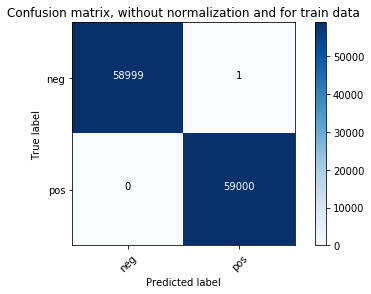

Confusion matrix, without normalization
[[15604    21]
 [  130   245]]


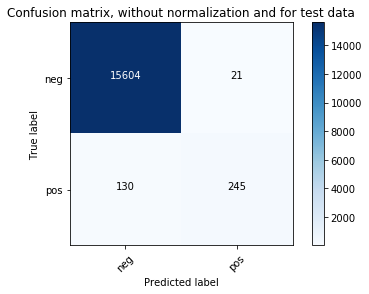

In [163]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
class_names = ["neg","pos"]
classes=class_names
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



# Compute confusion matrix
cnf_matrix = confusion_matrix(y_res, training_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization and for train data')
plt.show()

cnf_matrix = confusion_matrix(y_test,testing_pred)   
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization and for test data')
plt.show()

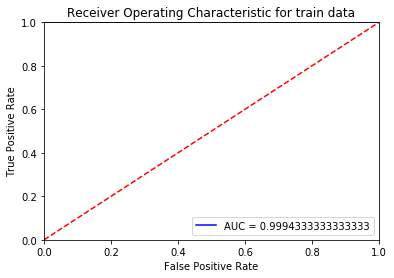

Misclassification rate is  0.0005666666666667153


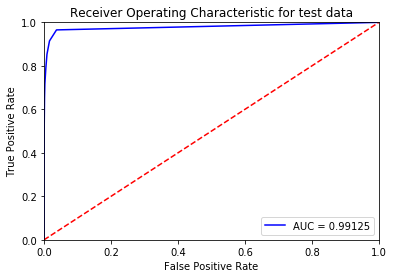

Misclassification rate is  0.008750000000000036


In [164]:
from sklearn import metrics 

#auct1 = accuracy_score(training_pred,y_res)
#auct2 = accuracy_score(testing_pred,y_test)

op = training_pred1[:,1]
ip = y_res


fpr, tpr, threshold = metrics.roc_curve(ip,op)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for train data')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(auctr))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Misclassification rate is ", (1 - auctr))

op1 = testing_pred1[:,1]
ip1 = y_test


fpr, tpr, threshold = metrics.roc_curve(ip1,op1)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic for test data')
plt.plot(fpr, tpr, 'b', label = 'AUC = {}'.format(aucte))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Misclassification rate is ", (1 - aucte))


In [165]:
oob1 = clf_b.oob_score_
print("The OOB error is",1- oob1)

The OOB error is 0.006576271186440663


## (e) Model Trees
## In the case of a univariate tree, only one input dimension is used at a tree split.
## In a multivariate tree, or model tree, at a decision node all input dimensions can
## be used and thus it is more general. In univariate classification trees, majority
## polling is used at each node to determine the split of that node as the decision
## rule. In model trees, a (linear) model that relies on all of the variables is used
## to determine the split of that node (i.e. instead of using Xj > s as the decision
## rule, one has P j βjXj > s. as the decision rule). Alternatively, in a regression
## tree, instead of using average in the region associated with each node, a linear
## regression model is used to determine the value associated with that node.
## One of the methods that can be used at each node is Logistic Regression. One
## can use scikit learn to call Weka to train Logistic Model Trees for classification.
## Train Logistic Model Trees for the APS data set without compensation for class
## imbalance. Use one of 5 fold, 10 fold, and leave-one-out cross validation methods
## to estimate the error of your trained model and compare it with the test error.
## Report the Confusion Matrix, ROC, and AUC for training and test sets.

In [166]:
from sklearn.grid_search import GridSearchCV
import weka.core.jvm as jvm
jvm.start()
import weka.core.converters as converters
from weka.classifiers import Evaluation
from weka.core.classes import Random
from weka.classifiers import Classifier

X_train = pd.DataFrame() 
y_train = pd.DataFrame() 
X_test  = pd.DataFrame() 
y_test  = pd.DataFrame() 

X_train = pp_train_x
y_train = pp_train_y
X_test  = pp_test_x
y_test  = pp_test_y

weka_y_train = y_train
weka_y_train = y_train.replace({0:'neg', 1:'pos'})
weka_train = pd.concat([X_train[:5000], weka_y_train[:5000]], axis=1)
weka_train.to_csv(sep=",", path_or_buf="weka_train.csv", index=False)
cls = Classifier(classname="weka.classifiers.trees.LMT")
data = converters.load_any_file("weka_train.csv")
data.class_is_last()

cls.build_classifier(data)

INFO:weka.core.jvm:JVM already running, call jvm.stop() first


In [167]:
evl = Evaluation(data)
evl.crossvalidate_model(classifier=cls, data=data, num_folds= 5, rnd=Random(1))
print(evl.percent_correct)
print(evl.summary())
print(evl.class_details())

98.86

Correctly Classified Instances        4943               98.86   %
Incorrectly Classified Instances        57                1.14   %
Kappa statistic                          0.6402
Mean absolute error                      0.0149
Root mean squared error                  0.0944
Relative absolute error                 42.2003 %
Root relative squared error             71.4274 %
Total Number of Instances             5000     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.996    0.416    0.992      0.996    0.994      0.644    0.964     0.998     neg
                 0.584    0.004    0.722      0.584    0.646      0.644    0.964     0.690     pos
Weighted Avg.    0.989    0.408    0.988      0.989    0.988      0.644    0.964     0.992     



In [168]:
from weka.plot.classifiers import plot_roc

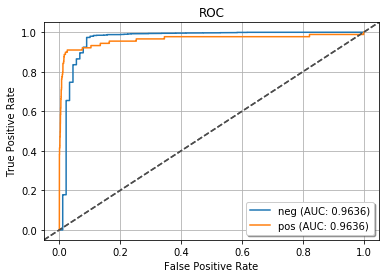

In [169]:
plot_roc(evl, class_index=[0,1])

In [170]:
evl.confusion_matrix

array([[4891.,   20.],
       [  37.,   52.]])

In [171]:
X_test  = pp_test_x
y_test  = pp_test_y

weka_y_test = y_test
weka_y_test = y_test.replace({0:'neg', 1:'pos'})
weka_test = pd.concat([X_test, weka_y_test], axis=1)
weka_test.to_csv(sep=",", path_or_buf="weka_test.csv", index=False)
# cls = Classifier(classname="weka.classifiers.trees.LMT")
data = converters.load_any_file("weka_test.csv")
data.class_is_last()

In [172]:
evl = Evaluation(data)
evl.test_model(classifier=cls, data=data)
print(evl.summary())


Correctly Classified Instances       15797               98.7313 %
Incorrectly Classified Instances       203                1.2688 %
Kappa statistic                          0.7006
Mean absolute error                      0.0168
Root mean squared error                  0.101 
Relative absolute error                 36.7311 %
Root relative squared error             66.79   %
Total Number of Instances            16000     



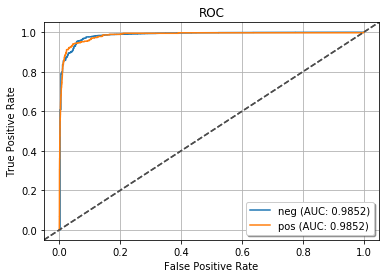

array([[15552.,    73.],
       [  130.,   245.]])

In [173]:
from weka.plot.classifiers import plot_roc
plot_roc(evl, class_index=[0,1])
evl.confusion_matrix

## (f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your
## data to compensate for class imbalance. Train a Logistic Model Tree using the
## pre-processed data and repeat 2e. Do not forget that there is a right and a wrong
## way of cross validation here. Compare the uncompensated case with SMOTE.

In [174]:
from imblearn.over_sampling import SMOTE 
from imblearn.combine import SMOTETomek
from collections import Counter

X_train = pd.DataFrame() 
y_train = pd.DataFrame() 
X_test  = pd.DataFrame() 
y_test  = pd.DataFrame() 

X_train = pp_train_x
y_train = pp_train_y
X_test  = pp_test_x
y_test  = pp_test_y

# sm = SMOTE(random_state=42, ratio="majority")
sm = SMOTETomek()
X_r, y_r = sm.fit_sample(X_train, y_train)
X_r = pd.DataFrame(X_r)
y_r = pd.DataFrame(y_r,columns=["170"])


weka_y_train = y_r
weka_y_train = weka_y_train.replace({0:'neg', 1:'pos'})
#weka_y_train = [0 if x == 'neg' else 1 for x in weka_y_train]
weka_train = pd.concat([X_r, weka_y_train], axis=1)
weka_train.to_csv(sep=",", path_or_buf="weka_train.csv", index=False)
cls = Classifier(classname="weka.classifiers.trees.LMT")
data = converters.load_any_file("weka_train.csv")
data.class_is_last()
cls.build_classifier(data)

In [175]:
evl = Evaluation(data)
evl.crossvalidate_model(classifier=cls, data=data, num_folds= 5, rnd=Random(1))
print(evl.percent_correct)
print(evl.summary())
print(evl.class_details())

98.5031868727963

Correctly Classified Instances      116218               98.5032 %
Incorrectly Classified Instances      1766                1.4968 %
Kappa statistic                          0.9701
Mean absolute error                      0.0248
Root mean squared error                  0.1125
Relative absolute error                  4.9537 %
Root relative squared error             22.498  %
Total Number of Instances           117984     

=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.983    0.013    0.987      0.983    0.985      0.970    0.996     0.996     neg
                 0.987    0.017    0.984      0.987    0.985      0.970    0.996     0.993     pos
Weighted Avg.    0.985    0.015    0.985      0.985    0.985      0.970    0.996     0.995     



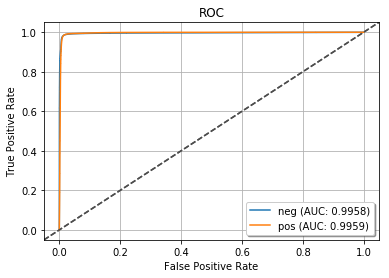

array([[58017.,   975.],
       [  791., 58201.]])

In [176]:
from weka.plot.classifiers import plot_roc
plot_roc(evl, class_index=[0,1])
evl.confusion_matrix

In [178]:
X_test  = pp_test_x
y_test  = pp_test_y

weka_y_test = y_test
weka_y_test = y_test.replace({0:'neg', 1:'pos'})
weka_test = pd.concat([X_test, weka_y_test], axis=1)
weka_test.to_csv(sep=",", path_or_buf="weka_test.csv", index=False)
# cls = Classifier(classname="weka.classifiers.trees.LMT")
data = converters.load_any_file("weka_test.csv")
data.class_is_last()

In [179]:
evl = Evaluation(data)
evl.test_model(classifier=cls, data=data)
print(evl.summary())


Correctly Classified Instances       15659               97.8688 %
Incorrectly Classified Instances       341                2.1313 %
Kappa statistic                          0.6449
Mean absolute error                      0.0233
Root mean squared error                  0.1304
Relative absolute error                 50.9339 %
Root relative squared error             86.1774 %
Total Number of Instances            16000     



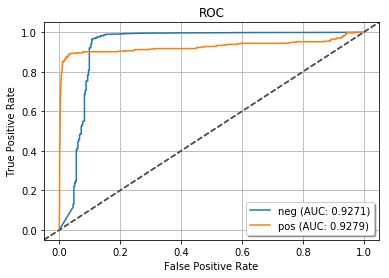

array([[15335.,   290.],
       [   51.,   324.]])

In [180]:
from weka.plot.classifiers import plot_roc
plot_roc(evl, class_index=[0,1])
evl.confusion_matrix

## 3. ISLR 6.8.3 
3. Suppose we estimate the regression coefficients in a linear regression
model by minimizing
n i=1 yi − β0 −p
=1
βjxij subject to p
j=1
|βj | ≤ s
for a particular value of s. For parts (a) through (e), indicate which
of i. through v. is correct. Justify your answer.
(a) As we increase s from 0, the training RSS will:
i. Increase initially, and then eventually start decreasing in an
inverted U shape.
ii. Decrease initially, and then eventually start increasing in a
U shape.
iii. Steadily increase.
iv. Steadily decrease.
v. Remain constant.
(b) Repeat (a) for test RSS.
(c) Repeat (a) for variance.
(d) Repeat (a) for (squared) bias.
(e) Repeat (a) for the irreducible error.

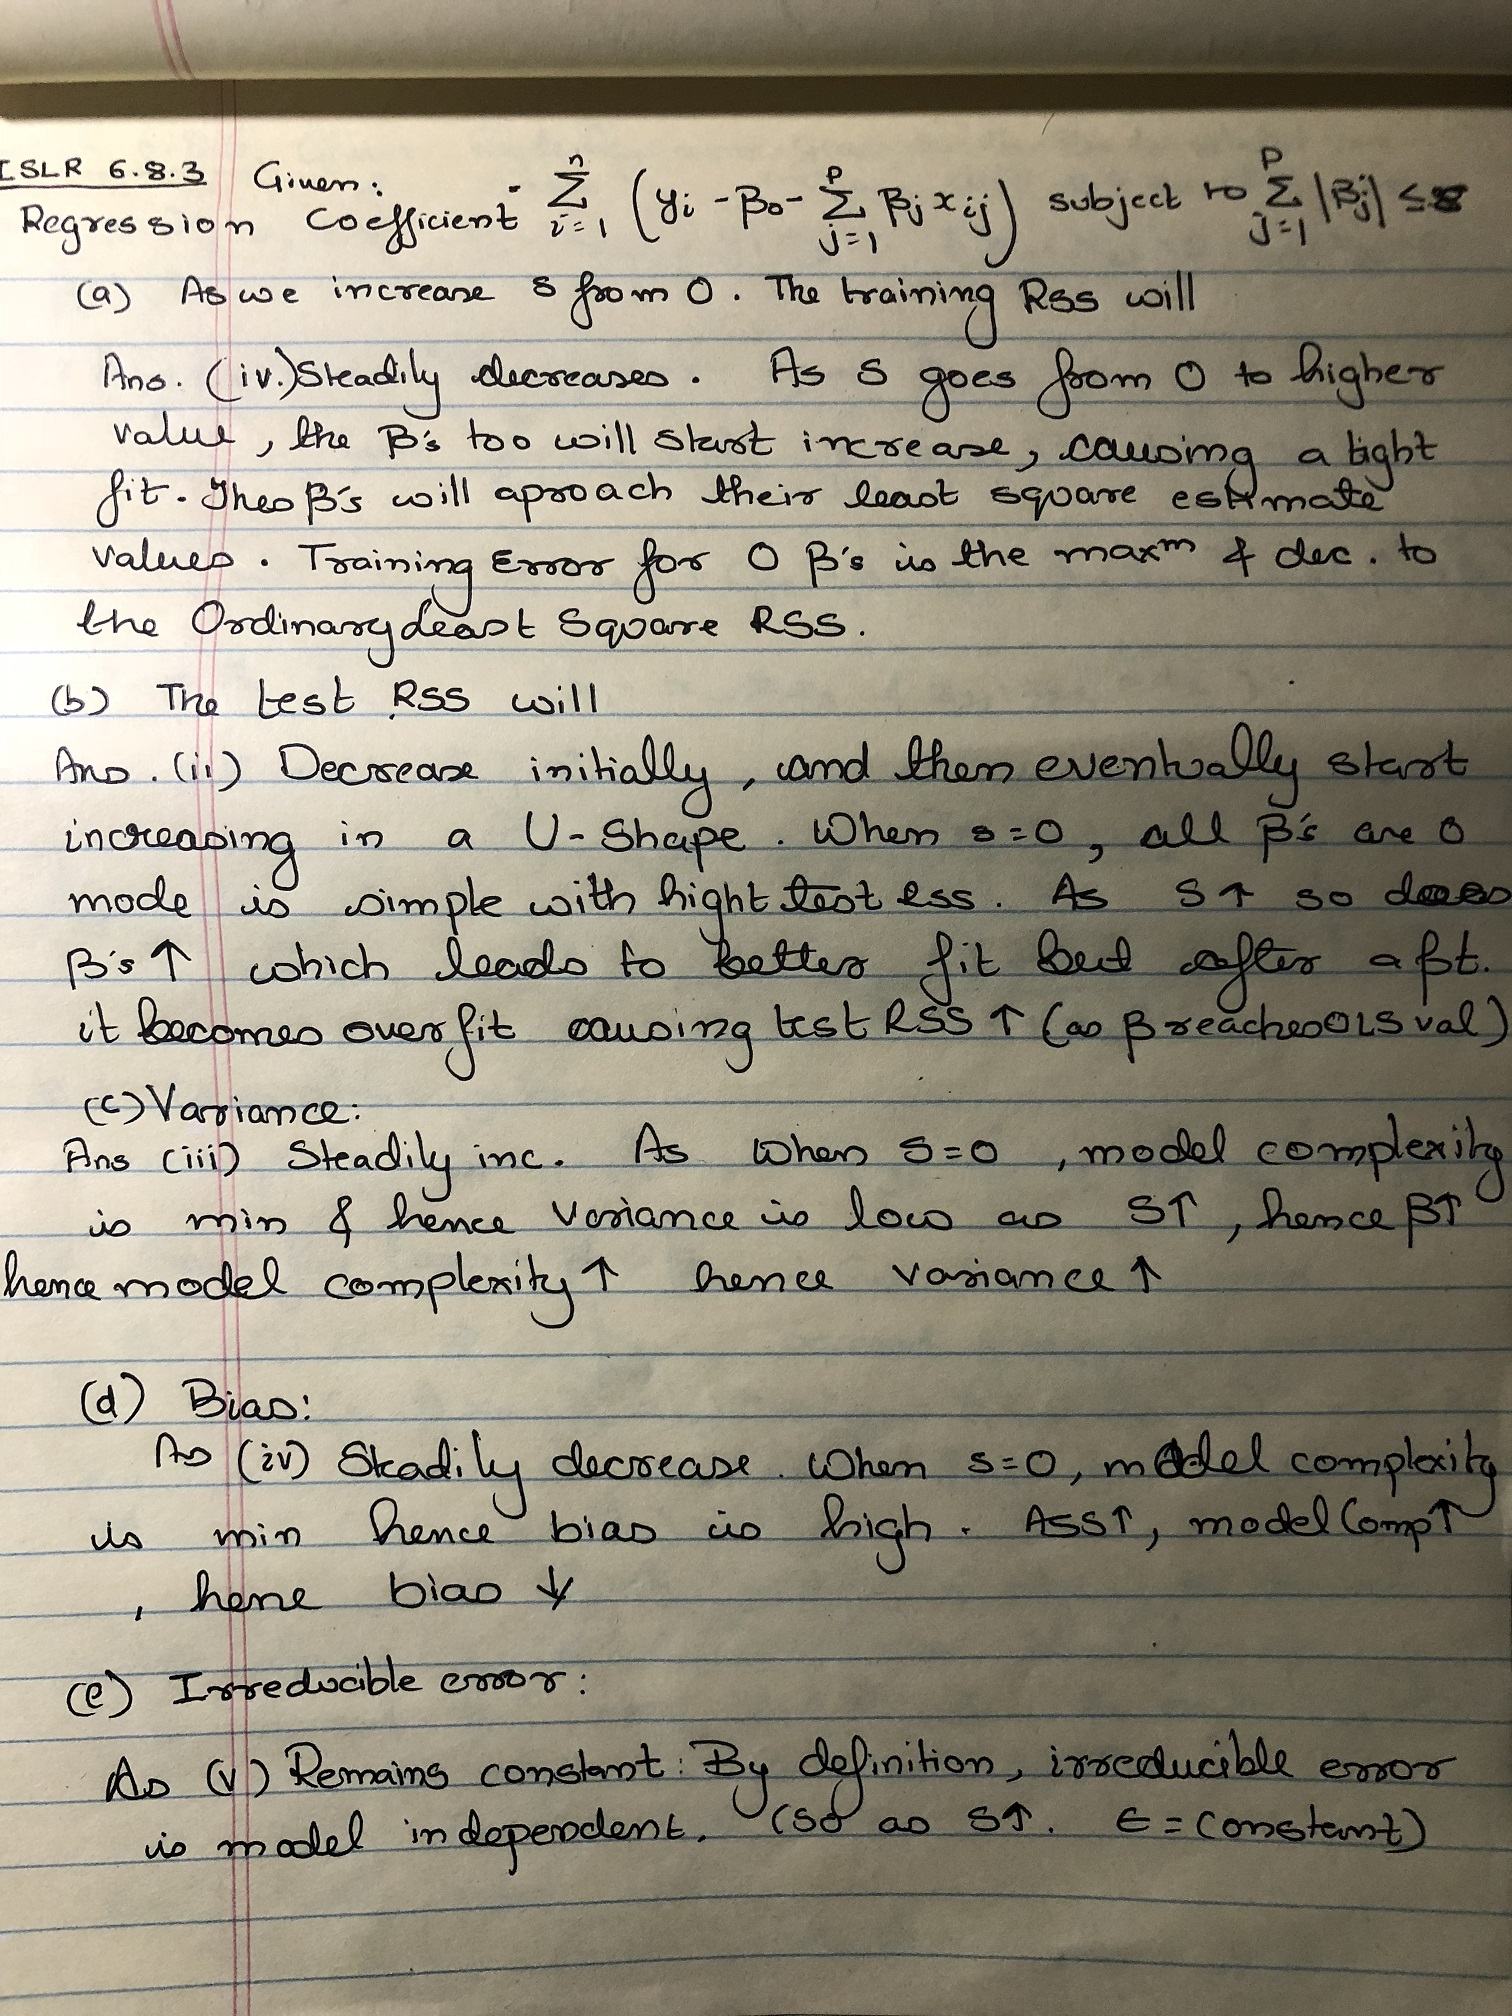

In [181]:
from IPython.display import Image
Image(filename='img1.jpg') 

## 4. ISLR, 6.8.5     

It is well-known that ridge regression tends to give similar coefficient
values to correlated variables, whereas the lasso may give quite different
coefficient values to correlated variables. We will now explore
this property in a very simple setting.
Suppose that n = 2, p = 2, x11 = x12, x21 = x22. Furthermore,
suppose that y1 +y2 = 0 and x11 +x21 = 0 and x12 +x22 = 0, so that
the estimate for the intercept in a least squares, ridge regression, or
lasso model is zero: βˆ0 = 0.
(a) Write out the ridge regression optimization problem in this setting.
(b) Argue that in this setting, the ridge coefficient estimates satisfy
βˆ1 = βˆ2.
(c) Write out the lasso optimization problem in this setting.
(d) Argue that in this setting, the lasso coefficients βˆ1 and βˆ2 are
not unique—in other words, there are many possible solutions
to the optimization problem in (c). Describe these solutions.



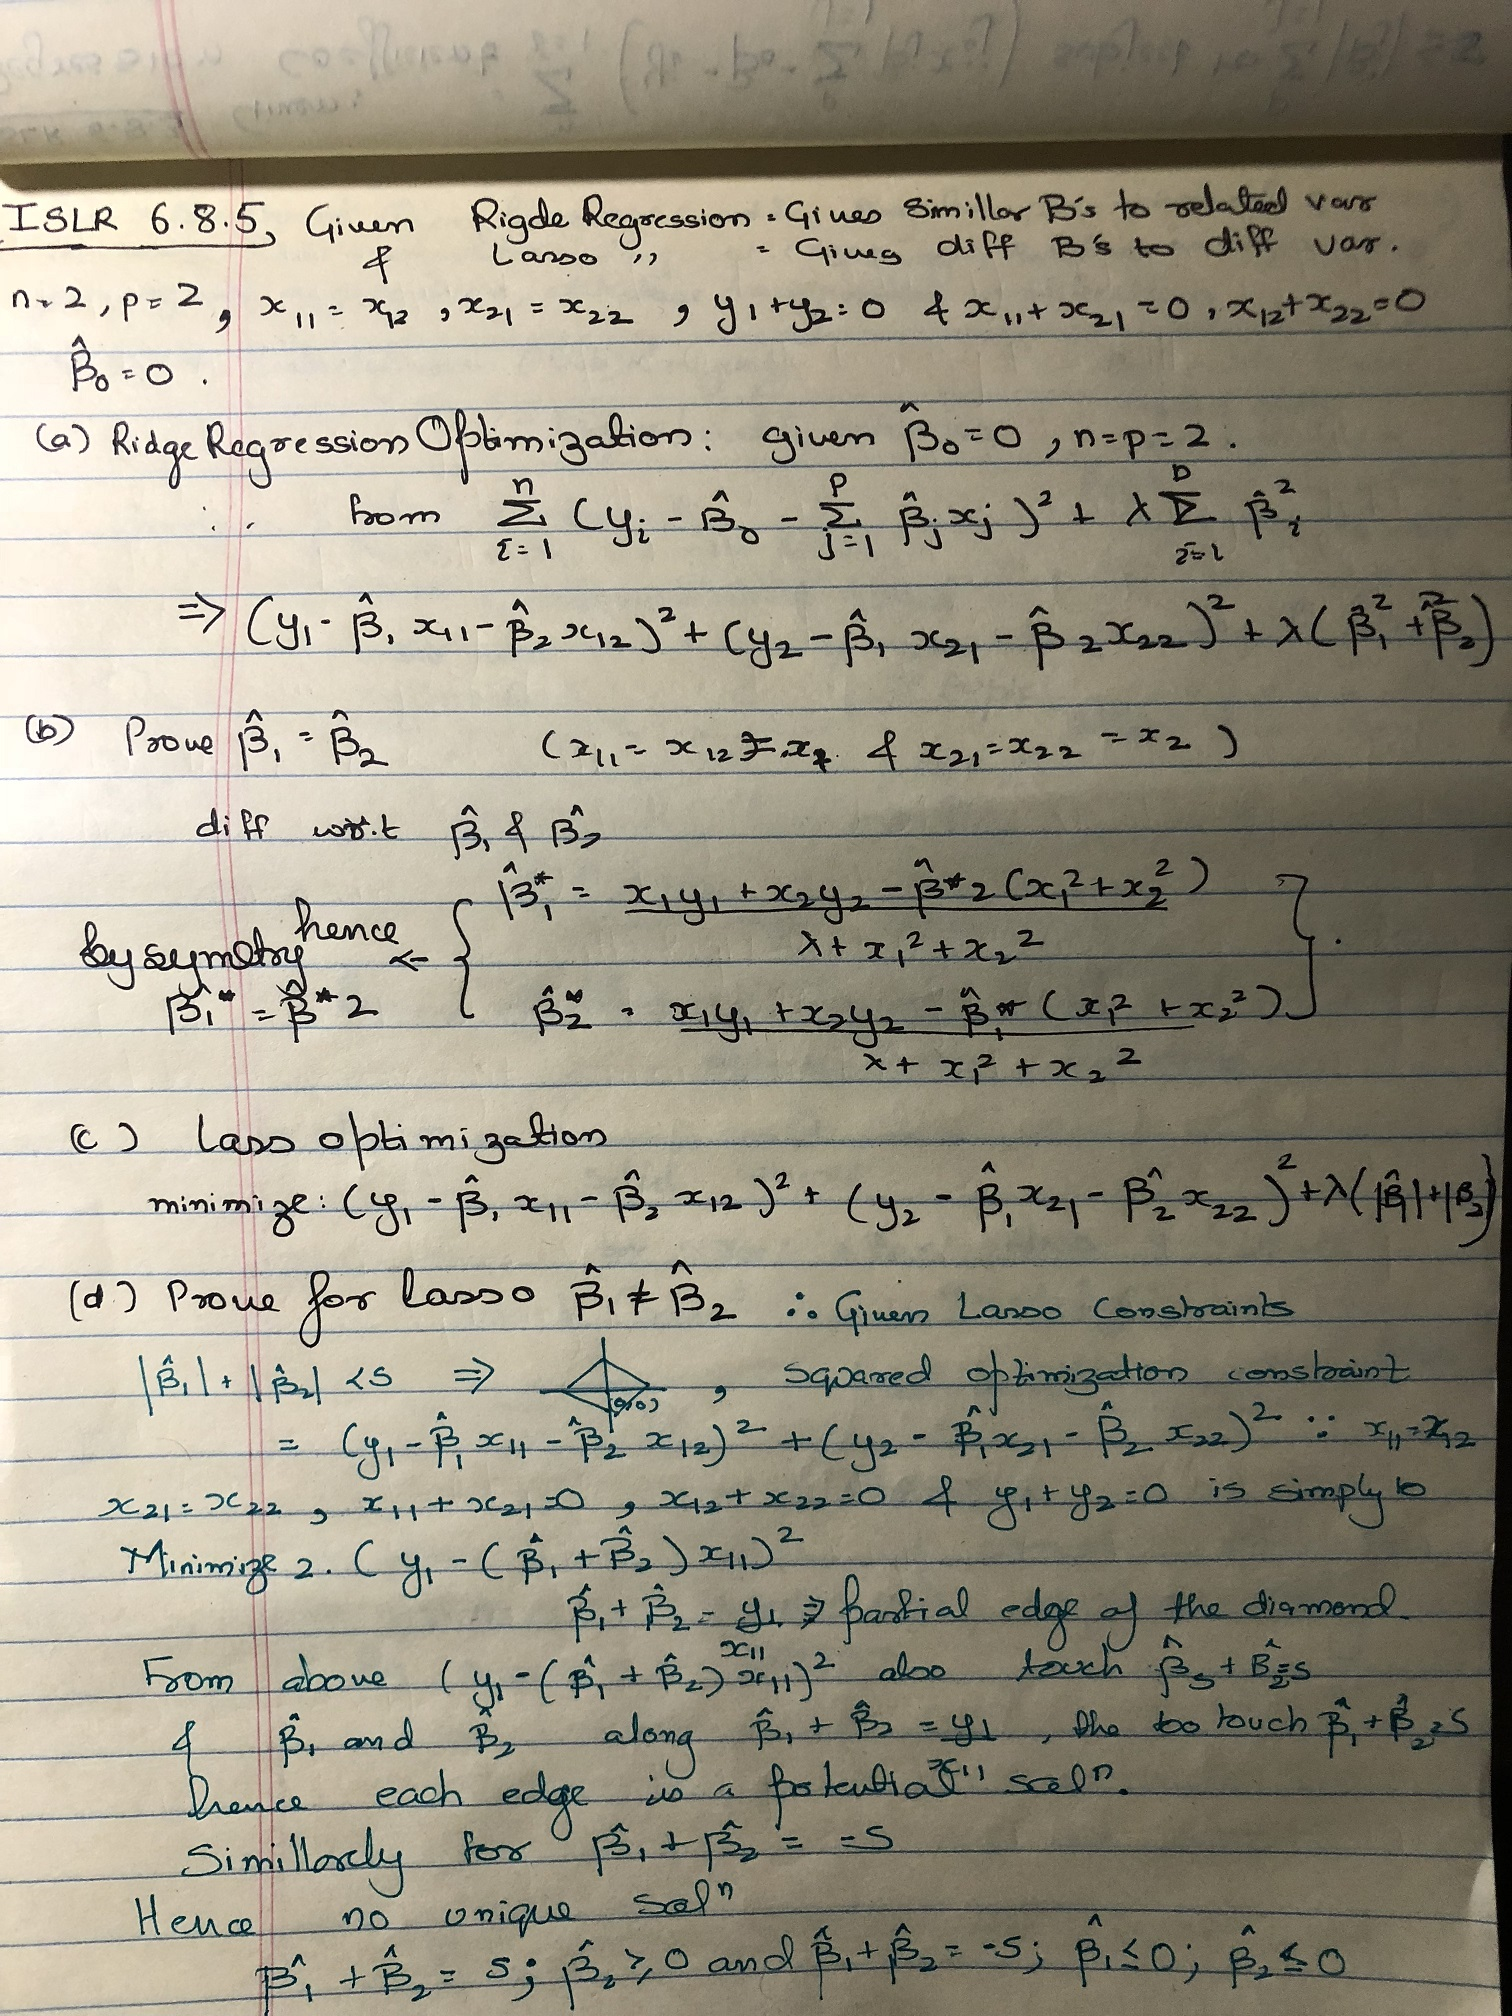

In [182]:
from IPython.display import Image
Image(filename='img2.jpg') 

## 5. ISLR 8.4.5    
5. Suppose we produce ten bootstrapped samples from a data set
containing red and green classes. We then apply a classification tree
to each bootstrapped sample and, for a specific value of X, produce
10 estimates of P(Class is Red|X):
0.1, 0.15, 0.2, 0.2, 0.55, 0.6, 0.6, 0.65, 0.7, and 0.75.
8.4 Exercises 333
5
15
0
10
3
0
1
X1
X2 1
0
X2 < 1
X1 < 1
X1 < 0
X2 < 2
2.49
−1.80 0.63 −1.06 0.21
FIGURE 8.12. Left: A partition of the predictor space corresponding to Exercise
4a. Right: A tree corresponding to Exercise 4b.
There are two common ways to combine these results together into a
single class prediction. One is the majority vote approach discussed in
this chapter. The second approach is to classify based on the average
probability. In this example, what is the final classification under each
of these two approaches?


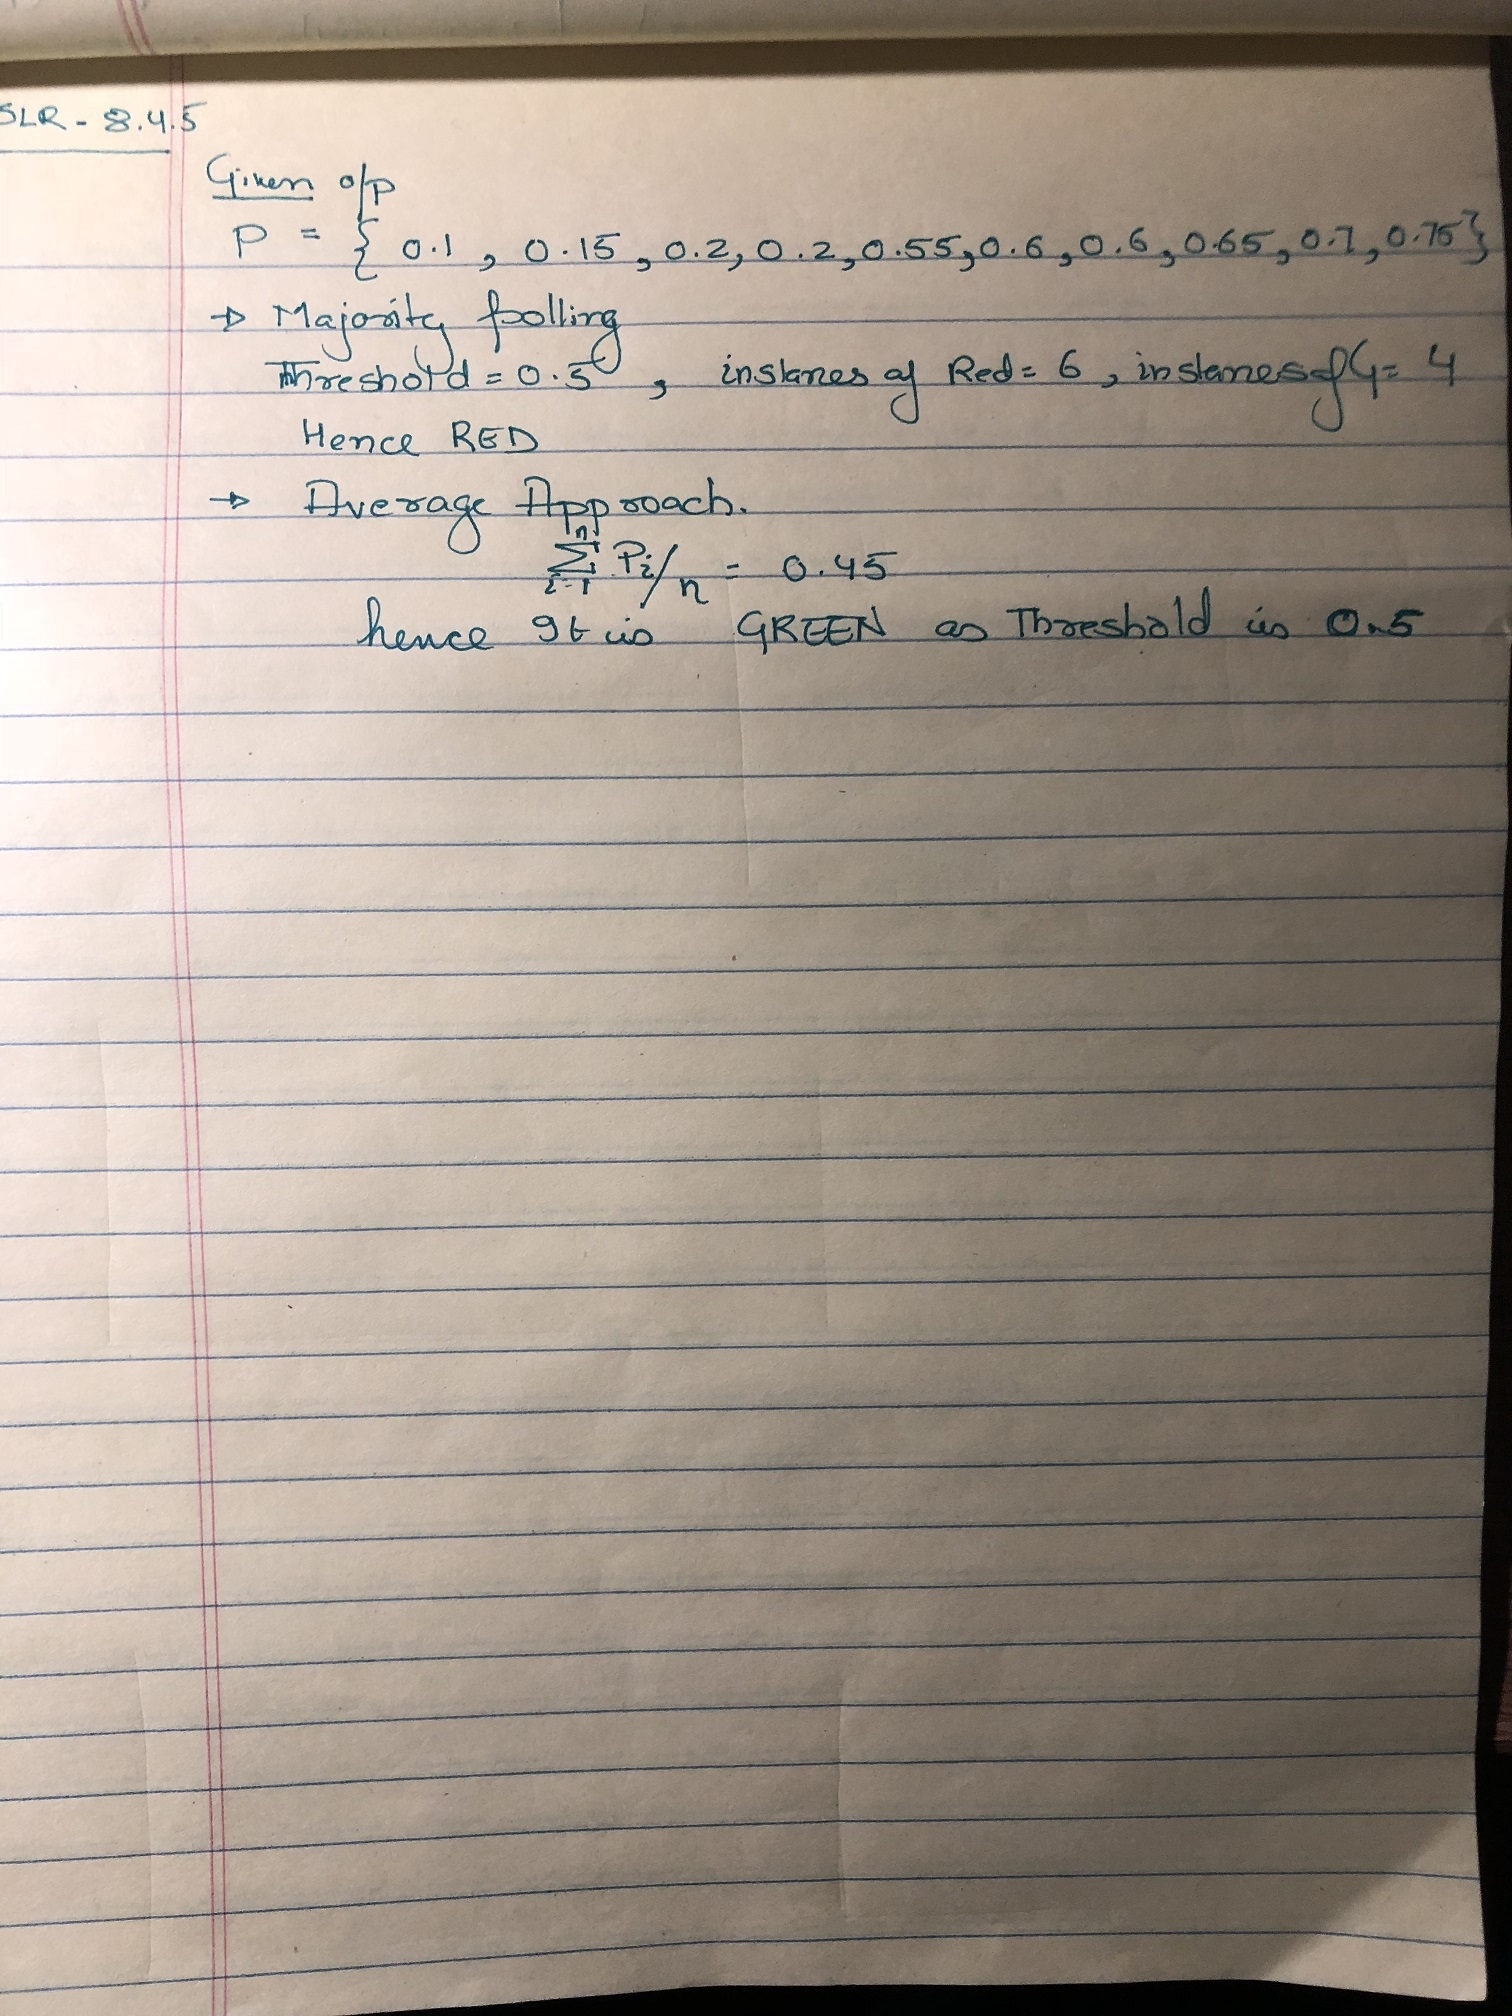

In [183]:
from IPython.display import Image
Image(filename='img4.jpg') 

## 6. ISLR 9.7.3

3. Here we explore the maximal margin classifier on a toy data set.
(a) We are given n = 7 observations in p = 2 dimensions. For each
observation, there is an associated class label.
9.7 Exercises 369
Obs. X1 X2 Y
1 3 4 Red
2 2 2 Red
3 4 4 Red
4 1 4 Red
5 2 1 Blue
6 4 3 Blue
7 4 1 Blue
Sketch the observations.
(b) Sketch the optimal separating hyperplane, and provide the equation
for this hyperplane (of the form (9.1)).
(c) Describe the classification rule for the maximal margin classifier.
It should be something along the lines of “Classify to Red if
β0 + β1X1 + β2X2 > 0, and classify to Blue otherwise.” Provide
the values for β0, β1, and β2.
(d) On your sketch, indicate the margin for the maximal margin
hyperplane.
(e) Indicate the support vectors for the maximal margin classifier.
(f) Argue that a slight movement of the seventh observation would
not affect the maximal margin hyperplane.
(g) Sketch a hyperplane that is not the optimal separating hyperplane,
and provide the equation for this hyperplane.
(h) Draw an additional observation on the plot so that the two
classes are no longer separable by a hyperplane.

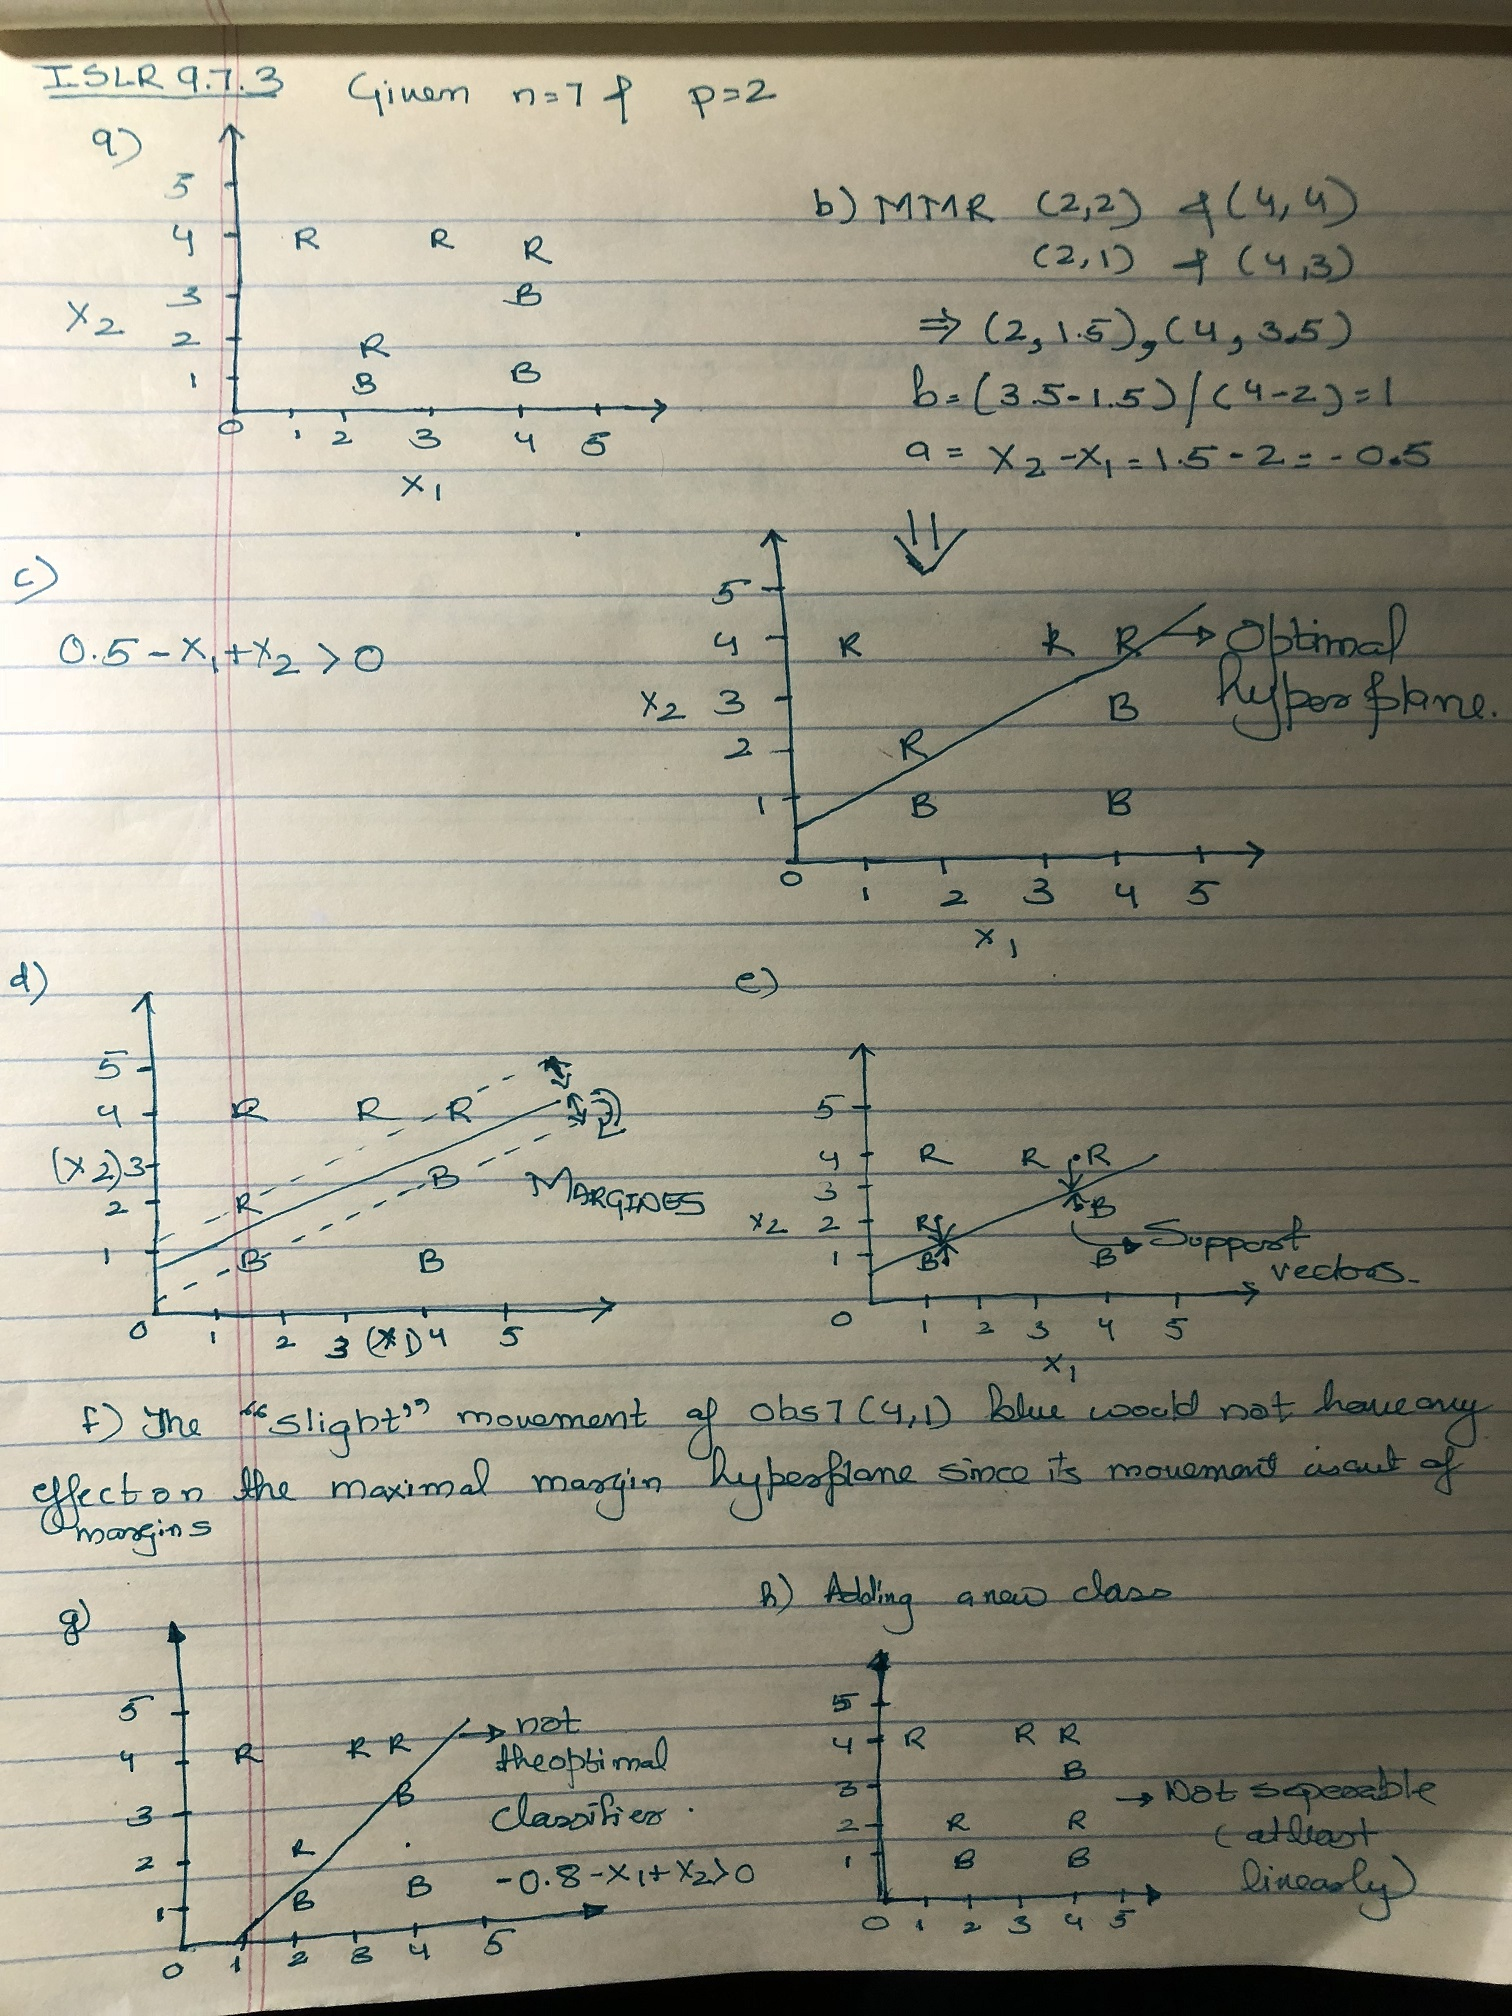

In [1]:
from IPython.display import Image
Image(filename='img3.jpg') 